<a href="https://colab.research.google.com/github/Ogu1208/Steam-data-analysis-classification-model-training-time-series-prediction/blob/main/Steam_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EC%84%9D_%2B_%EC%8B%9C%EA%B3%84%EC%97%B4_%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

#For plotting
import matplotlib.pyplot as plt
import datetime as dt
from pandas.plotting import scatter_matrix

import matplotlib.dates as mdates
from itertools import chain # 효율적인 반복을 위한 함수
plt.style.use('dark_background')

In [ ]:
data = pd.read_csv('AllData.csv')
print('AllData.csv파일에는 '+str(len(data))+' 개의 게임을 포함하고 있습니다..')
data.columns
data.info()

AllData.csv파일에는 10576 개의 게임을 포함하고 있습니다..
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10576 entries, 0 to 10575
Data columns (total 81 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   App_id                       10576 non-null  int64  
 1   Name                         10576 non-null  object 
 2   ReleaseDate                  10576 non-null  object 
 3   RequiredAge                  10576 non-null  int64  
 4   DemoCount                    10576 non-null  int64  
 5   DeveloperCount               10576 non-null  int64  
 6   DLCCount                     10576 non-null  int64  
 7   Metacritic                   10576 non-null  int64  
 8   MovieCount                   10576 non-null  int64  
 9   PackageCount                 10576 non-null  int64  
 10  RecommendationCount          10576 non-null  int64  
 11  PublisherCount               10576 non-null  int64  
 12  ScreenshotCount              1057

In [ ]:
steamCharts = pd.read_csv('SteamCharts.csv',index_col=False,low_memory=False)
steamCharts.head()

,Name,App_id,Avg_Players,Gain,Perc_Gain,Peak_Players,Last 30 Days,April 2021,March 2021,February 2021,...,April 2013,March 2013,February 2013,January 2013,December 2012,November 2012,October 2012,September 2012,August 2012,July 2012
0,Counter-Strike: Global Offensive,730,1.0,0.0,0.0,0.0,694478.21,723346.52,740927.82,741013.24,...,16006.0,15959.89,17372.73,16164.22,14079.39,14134.1,10739.48,16000.75,15475.39,932.57
1,Counter-Strike: Global Offensive,730,0.0,1.0,0.0,0.0,-28868.3,-17581.31,-85.42,-2196.42,...,46.11,-1412.84,1208.51,2084.83,-54.71,3394.62,-5261.27,525.36,14542.81,NaN
2,Counter-Strike: Global Offensive,730,0.0,0.0,1.0,0.0,-3.99,-2.37,-0.01,-0.30,...,+0.29,-8.13,+7.48,+14.81,-0.39,+31.61,-32.88,+3.39,+1559.43,NaN
3,Counter-Strike: Global Offensive,730,0.0,0.0,0.0,1.0,1119102,1148077.00,1198581.00,1123485.00,...,31966,32166,35238,31359,27553,50533,20850,36057,52261,1642.00
4,Dota 2,570,1.0,0.0,0.0,0.0,412538.77,413784.97,390412.76,404832.13,...,174835.73,180878.9,166972.97,147748.14,121924.42,101077.43,75965.44,61867.68,55768.61,52721.05


In [ ]:
steamCharts_xcovid = pd.read_csv('AllData.csv')


ex_cols =  ['April 2021','March 2021','February 2021','January 2021',
            'December 2020','November 2020','October 2020','September 2020',
            'August 2020','July 2020','June 2020','May 2020','April 2020',
            'March 2020','February 2020','January 2020','December 2019',
            'November 2019','October 2019','September 2019','August 2019','July 2019',]
steamCharts_xcovid = steamCharts_xcovid[[col for col in steamCharts_xcovid.columns if col not in ex_cols]]

steamCharts_xcovid.head()

,App_id,Name,ReleaseDate,RequiredAge,DemoCount,DeveloperCount,DLCCount,Metacritic,MovieCount,PackageCount,...,PCRecReqsText,LinuxMinReqsText,LinuxRecReqsText,MacMinReqsText,MacRecReqsText,SteamSpyOwnersNew,peak_max,peak_mean,max,mean
0,578080,PLAYERUNKNOWN'S BATTLEGROUNDS,Dec 21 2017,0,0,1,0,86,11,1,...,Recommended:Requires a 64-bit processor and op...,Minimum:Requires a 64-bit processor and operat...,Recommended:Requires a 64-bit processor and op...,Minimum:Requires a 64-bit processor and operat...,Recommended:Requires a 64-bit processor and op...,56061000.0,3236027.0,1.038021e+06,1584886.77,470328.382800
1,730,Counter-Strike: Global Offensive,Aug 21 2012,0,0,1,0,83,8,1,...,,Minimum:OS: Ubuntu 12.04Processor: 64-bit Dual...,,Minimum:OS: MacOS X 10.6.6 or higherProcessor:...,,83851000.0,1305714.0,5.562232e+05,857604.22,316635.260189
2,570,Dota 2,Jul 9 2013,0,0,1,0,90,4,0,...,,Minimum:OS: Ubuntu 12.04Processor: Dual core f...,,Minimum:OS: OS X Mavericks 10.9Processor: Dual...,,174686000.0,1291328.0,7.820687e+05,709178.26,452757.727453
3,1091500,Cyberpunk 2077,Dec 9 2020,17,0,1,0,85,12,1,...,Recommended:Requires a 64-bit processor and op...,Minimum:Requires a 64-bit processor and operat...,Recommended:Requires a 64-bit processor and op...,Minimum:Requires a 64-bit processor and operat...,Recommended:Requires a 64-bit processor and op...,16006000.0,830387.0,2.302768e+05,332395.65,93077.502000
4,377160,Fallout 4,Nov 9 2015,17,0,1,7,84,10,1,...,Recommended:OS: Windows 7/8/10 (64-bit OS requ...,,,,,6343000.0,471955.0,4.275848e+04,226297.83,22651.106970


# 시계열 데이터 분리, 분석 및 출력 테스트
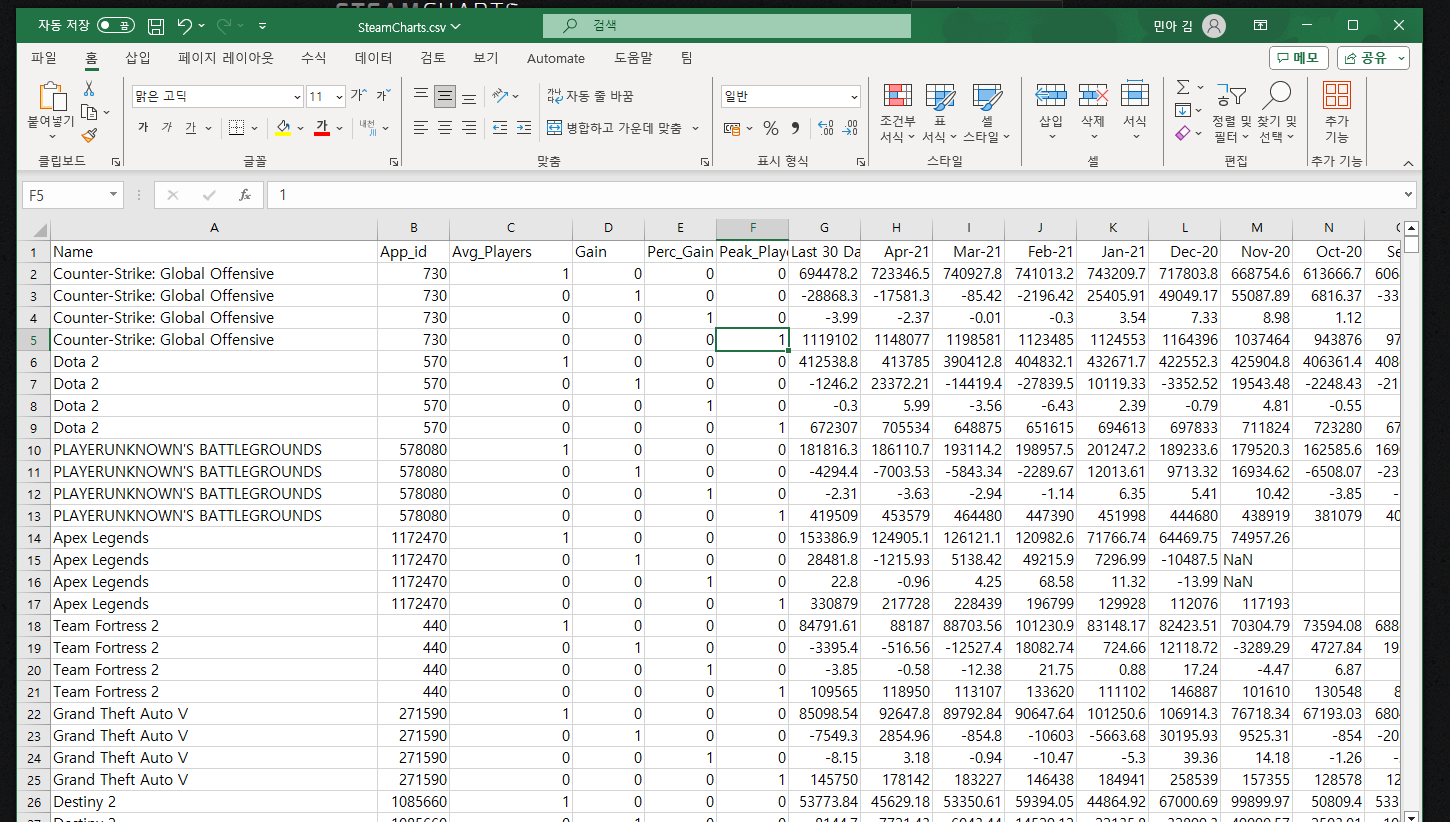

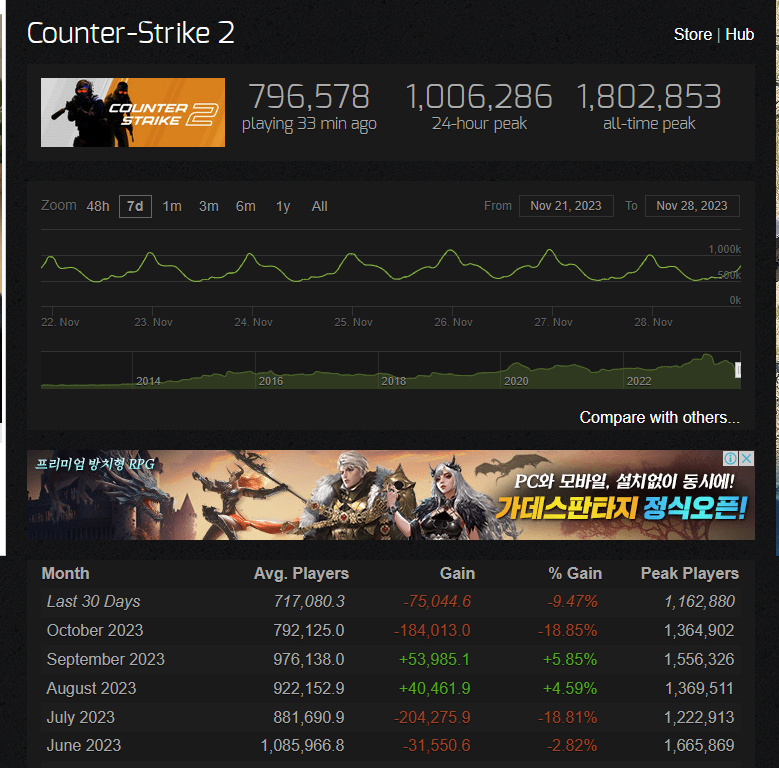

In [ ]:
# Get Avg_Players. (Avg_Players=1인 즉, Avg_players를 나타낸 행들 추출)
avg_players = steamCharts.loc[steamCharts['Avg_Players']==1]
avg_players = avg_players.drop(columns=['Avg_Players', 'Gain', 'Perc_Gain', 'Peak_Players','Last 30 Days'])
avg_pure = avg_players.drop(columns=['App_id', 'Name']).astype(float)  # App_id, Name 컬럼 제거 및 나머지 열 데이터 타입 float로 변경

# Get Peak_Players.
peak_players = steamCharts.loc[steamCharts['Peak_Players']==1]
peak_players = peak_players.drop(columns=['Avg_Players', 'Gain', 'Perc_Gain', 'Peak_Players','Last 30 Days'])
peak_pure = peak_players.drop(columns=['App_id', 'Name']).astype(float)

# Get Perc_Gain.
p_gain = steamCharts.loc[steamCharts['Perc_Gain']==1]
p_gain = p_gain.drop(columns=['Avg_Players', 'Gain', 'Perc_Gain', 'Peak_Players','Last 30 Days'])
p_gain_pure = p_gain.drop(columns=['App_id', 'Name']).astype(float)

# Get Gain.
gain = steamCharts.loc[steamCharts['Gain']==1]
gain = gain.drop(columns=['Avg_Players', 'Gain', 'Perc_Gain', 'Peak_Players','Last 30 Days'])
gain_pure = gain.drop(columns=['App_id', 'Name']).astype(float)

In [ ]:
# Avg_Players 행 특정 게임 출력 테스트
avg_players=avg_players.reset_index(drop=True)
game_index=[]
game_index.append(avg_players[avg_players['Name']=='Among Us'].index[0])
game_index.append(avg_players[avg_players['Name']=='Dota 2'].index[0])
game_index.append(avg_players[avg_players['Name']=='Project Zomboid'].index[0])
game_index.append(avg_players[avg_players['Name']=='Counter-Strike: Global Offensive'].index[0])

avg_players.iloc[game_index]

,Name,App_id,April 2021,March 2021,February 2021,January 2021,December 2020,November 2020,October 2020,September 2020,...,April 2013,March 2013,February 2013,January 2013,December 2012,November 2012,October 2012,September 2012,August 2012,July 2012
84,Among Us,945360,19749.26,16490.54,24485.51,42007.22,66538.53,114344.38,176453.91,151380.28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Dota 2,570,413784.97,390412.76,404832.13,432671.65,422552.32,425904.83,406361.36,408609.78,...,174835.73,180878.9,166972.97,147748.14,121924.42,101077.43,75965.44,61867.68,55768.61,52721.05
127,Project Zomboid,108600,3952.27,2065.29,1792.99,2044.64,1944.54,2756.02,1674.95,1226.24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,Counter-Strike: Global Offensive,730,723346.52,740927.82,741013.24,743209.66,717803.75,668754.58,613666.69,606850.32,...,16006.0,15959.89,17372.73,16164.22,14079.39,14134.1,10739.48,16000.75,15475.39,932.57


# 시계열 시각화

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False #축의 음수 기호 표시

In [ ]:
avg_players

,Name,App_id,April 2021,March 2021,February 2021,January 2021,December 2020,November 2020,October 2020,September 2020,...,April 2013,March 2013,February 2013,January 2013,December 2012,November 2012,October 2012,September 2012,August 2012,July 2012
0,Counter-Strike: Global Offensive,730,723346.52,740927.82,741013.24,743209.66,717803.75,668754.58,613666.69,606850.32,...,16006.0,15959.89,17372.73,16164.22,14079.39,14134.1,10739.48,16000.75,15475.39,932.57
4,Dota 2,570,413784.97,390412.76,404832.13,432671.65,422552.32,425904.83,406361.36,408609.78,...,174835.73,180878.9,166972.97,147748.14,121924.42,101077.43,75965.44,61867.68,55768.61,52721.05
8,PLAYERUNKNOWN'S BATTLEGROUNDS,578080,186110.65,193114.18,198957.52,201247.19,189233.58,179520.26,162585.64,169093.71,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,Apex Legends,1172470,124905.13,126121.06,120982.64,71766.74,64469.75,74957.26,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,Team Fortress 2,440,88187.00,88703.56,101230.91,83148.17,82423.51,70304.79,73594.08,68866.24,...,41942.51,43336.2,43210.75,44255.06,43623.98,42498.53,46978.7,50699.07,61561.37,45566.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50080,The Westport Independent,352240,1.04,NaN,1.26,NaN,NaN,NaN,NaN,0.36,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50084,Nancy Drew: Warnings at Waverly Academy,43600,5.44,6.08,6.99,7.93,7.83,5.57,5.32,5.19,...,0.55,0.72,0.54,1.09,1.27,0.63,0.4,0.67,0.78,1.37
50088,神舞幻想 Faith of Danschant - Original Soundtrack,779660,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
50092,Hentai Splash 2,1315460,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00


April 2021        19749.26
March 2021        16490.54
February 2021     24485.51
January 2021      42007.22
December 2020     66538.53
                    ...   
November 2012          NaN
October 2012           NaN
September 2012         NaN
August 2012            NaN
July 2012              NaN
Name: 336, Length: 106, dtype: float64
mean : 21174.478666666666
April 2021        413784.97
March 2021        390412.76
February 2021     404832.13
January 2021      432671.65
December 2020     422552.32
                    ...    
November 2012     101077.43
October 2012       75965.44
September 2012     61867.68
August 2012        55768.61
July 2012          52721.05
Name: 4, Length: 106, dtype: float64
mean : 452757.7274528302
April 2021        3952.27
March 2021        2065.29
February 2021     1792.99
January 2021      2044.64
December 2020     1944.54
                   ...   
November 2012         NaN
October 2012          NaN
September 2012        NaN
August 2012           NaN
July 201

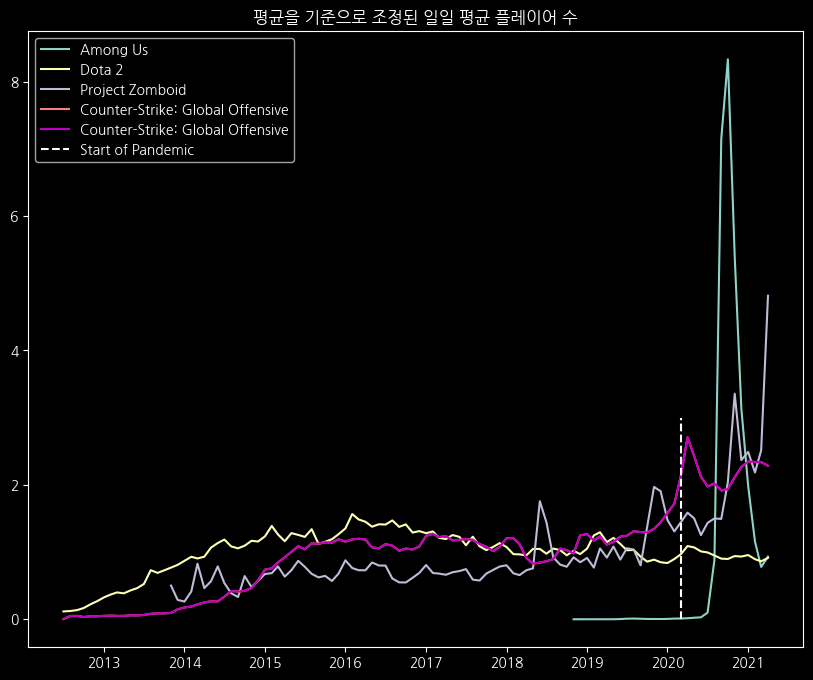

In [ ]:
# 'Name' 및 'App_id' 열을 제외하고, 열 이름을 날짜 형식으로 변환
months= pd.to_datetime(avg_players.drop(columns=['Name','App_id']).columns)
fig=plt.figure(figsize=(10,8))

for i in game_index:
    plot_data=avg_pure.iloc[i]/avg_pure.iloc[i].mean() # 각 게임의 평균을 기준으로 조정된 데이터를 계산해 plot_data에 저장
    print(avg_pure.iloc[i])
    print('mean : ' + str(avg_pure.iloc[i].mean()))
    plt.plot(months,plot_data,label = avg_players.Name[i]) # 플롯에 데이터 추가 및 게임 이름 표시

# 데이터셋의 0번째 인덱스 게임 추가
plt.plot(months,avg_pure.iloc[0]/avg_pure.iloc[0].mean(),'m',label = avg_players.Name[0])
plt.title('평균을 기준으로 조정된 일일 평균 플레이어 수')

# 코로나 시작 지점 표시
plt.vlines(pd.to_datetime('March 2020'),0,3,linestyles='dashed',label='Start of Pandemic')
plt.legend() # 범례
plt.show()


In [ ]:
plot_data.info()

<class 'pandas.core.series.Series'>
Index: 106 entries, April 2021 to July 2012
Series name: 0
Non-Null Count  Dtype  
--------------  -----  
106 non-null    float64
dtypes: float64(1)
memory usage: 1.7+ KB


코로나 이후 플레이어 수가 대부분 증가함

# 인공지능 시계열 예측 - 최적 ARIMA 모형

학습데이터, 테스트 데이터 나누기

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 주어진 코드에서 필요한 부분을 가져와 사용
months = pd.to_datetime(avg_players.drop(columns=['Name', 'App_id']).columns)
fig = plt.figure(figsize=(10, 8))

# ... (주어진 코드에서 필요한 부분)

# 학습 데이터와 테스트 데이터를 나누기
train_size = int(0.8 * len(months))
df_tlsa_train = pd.DataFrame()
df_tlsa_test = pd.DataFrame()

# 학습 데이터: 80% 이전의 데이터
df_tlsa_train['date'] = months[-train_size:][::-1]
for i in game_index:
    # Among Us 제외
    if avg_players.Name[i] != 'Among Us':
        plot_data = avg_pure.iloc[i] / avg_pure.iloc[i].mean()
        df_tlsa_train[avg_players.Name[i]] = plot_data.values[-train_size:][::-1]

# 테스트 데이터: 나머지 20%의 데이터
df_tlsa_test['date'] = months[:-train_size][::-1]
for i in game_index:
    # Among Us 제외
    if avg_players.Name[i] != 'Among Us':
        plot_data = avg_pure.iloc[i] / avg_pure.iloc[i].mean()
        df_tlsa_test[avg_players.Name[i]] = plot_data.values[:-train_size][::-1]

# 날짜 열을 인덱스로 설정
df_tlsa_train.set_index('date', inplace=True)
df_tlsa_test.set_index('date', inplace=True)

# 결과 출력
print("학습 데이터:")
print(df_tlsa_train.head())
print("\n테스트 데이터:")
print(df_tlsa_test.head())


학습 데이터:
              Dota 2  Project Zomboid  Counter-Strike: Global Offensive
date                                                                   
2012-07-01  0.116444              NaN                          0.002945
2012-08-01  0.123175              NaN                          0.048874
2012-09-01  0.136646              NaN                          0.050534
2012-10-01  0.167784              NaN                          0.033918
2012-11-01  0.223248              NaN                          0.044638

테스트 데이터:
              Dota 2  Project Zomboid  Counter-Strike: Global Offensive
date                                                                   
2019-07-01  1.026570         1.057139                          1.243648
2019-08-01  1.031784         1.037308                          1.310964
2019-09-01  0.932002         0.802365                          1.297789
2019-10-01  0.857756         1.379155                          1.291692
2019-11-01  0.887741         1.969515         

<Figure size 1000x800 with 0 Axes>

학습데이터, 테스트 데이터 시각화

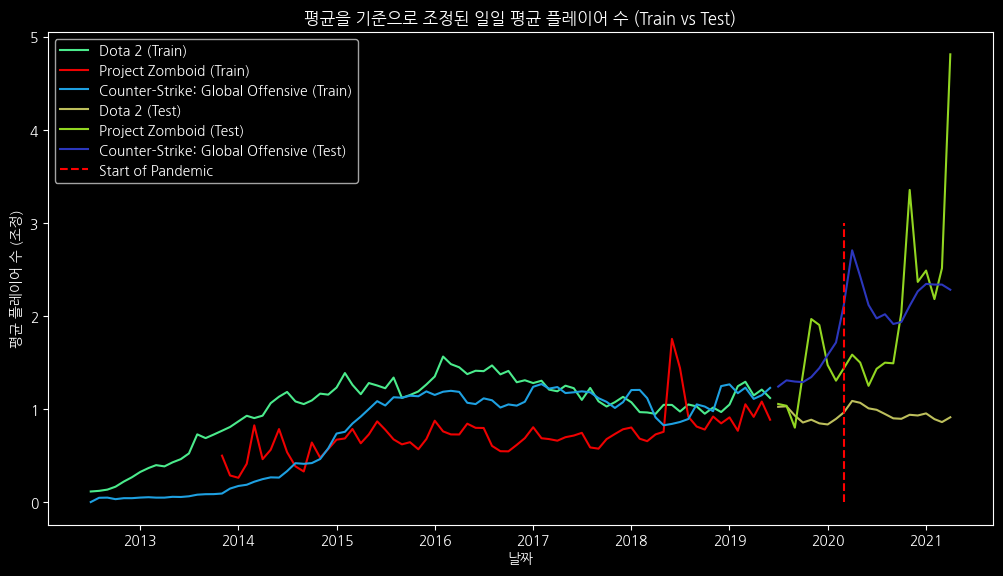

In [ ]:
import matplotlib.pyplot as plt
import random

# 학습 데이터와 테스트 데이터를 plt plot으로 나타내기
plt.figure(figsize=(12.2, 6.4))

# 학습 데이터 플롯
for column in df_tlsa_train.columns:
    color = (random.random(), random.random(), random.random())  # 랜덤한 RGB 값을 생성하여 색상으로 사용
    plt.plot(df_tlsa_train.index, df_tlsa_train[column], label=column + ' (Train)', color=color)

# 테스트 데이터 플롯
for column in df_tlsa_test.columns:
    color = (random.random(), random.random(), random.random())  # 랜덤한 RGB 값을 생성하여 색상으로 사용
    plt.plot(df_tlsa_test.index, df_tlsa_test[column], label=column + ' (Test)', color=color)

plt.title('평균을 기준으로 조정된 일일 평균 플레이어 수 (Train vs Test)')
plt.xlabel('날짜')
plt.ylabel('평균 플레이어 수 (조정)')
plt.vlines(pd.to_datetime('March 2020'), 0, 3, linestyles='dashed', label='Start of Pandemic', colors='r')
plt.legend()
plt.show()


In [ ]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 9.3 MB/s eta 0:00:00


In [ ]:
from pmdarima.arima.utils import ndiffs
import pandas as pd

def find_diff_order(data):
    adf_diffs = {}
    kpss_diffs = {}
    pp_diffs = {}

    for column in data.columns:
        # 결측치를 평균값으로 대체
        column_data = data[column].fillna(data[column].mean())

        adf_diffs[column] = ndiffs(column_data, test='adf')
        kpss_diffs[column] = ndiffs(column_data, test='kpss')
        pp_diffs[column] = ndiffs(column_data, test='pp')

    return adf_diffs, kpss_diffs, pp_diffs

# 예시 사용법
adf_diffs, kpss_diffs, pp_diffs = find_diff_order(df_tlsa_train)
print("최적의 차분 횟수 (ADF):")
print(adf_diffs)
print("\n최적의 차분 횟수 (KPSS):")
print(kpss_diffs)
print("\n최적의 차분 횟수 (PP):")
print(pp_diffs)


최적의 차분 횟수 (ADF):
{'Dota 2': 1, 'Project Zomboid': 1, 'Counter-Strike: Global Offensive': 1}

최적의 차분 횟수 (KPSS):
{'Dota 2': 2, 'Project Zomboid': 1, 'Counter-Strike: Global Offensive': 1}

최적의 차분 횟수 (PP):
{'Dota 2': 1, 'Project Zomboid': 0, 'Counter-Strike: Global Offensive': 1}


## ARIMA 모형 탐색

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

# ARIMA 모델 탐색 및 학습 함수
def train_arima_model(series, d=1, max_p=2, max_q=2, m=1):
    model_fit = pm.auto_arima(
        y=series.fillna(series.mean()),  # 결측치를 평균 값으로 대체
        d=d,
        start_p=0, max_p=max_p,
        start_q=0, max_q=max_q,
        m=m, seasonal=False,  # 데이터에 계절성이 없음
        stepwise=True,
        trace=True
    )
    return model_fit

# 각 게임에 대한 ARIMA 모델을 학습하고 결과를 저장
arima_models = {}

for game_name in df_tlsa_train.columns:
    if game_name != 'Among Us':  # Among Us는 제외
        print(f"\nTraining ARIMA model for {game_name}...")
        model_fit = train_arima_model(df_tlsa_train[game_name])
        arima_models[game_name] = model_fit

# 학습된 ARIMA 모델 결과 출력
for game_name, model_fit in arima_models.items():
    print(f"\nARIMA Model Summary for {game_name}:")
    print(model_fit.summary())



Training ARIMA model for Dota 2...
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-176.514, Time=0.10 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-175.612, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-175.799, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-176.706, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-173.972, Time=0.24 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.527 seconds

Training ARIMA model for Project Zomboid...
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-47.273, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-46.946, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-49.629, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-49.262, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.28 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-61.669, Time=0.13 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AI

## 최적ARIMA 모형으로 예측

In [ ]:
# 최적 ARIMA 모델로 예측 함수
def predict_arima_model(model_fit, test_data):
    # 예측 수행
    pred = model_fit.predict(n_periods=len(test_data))
    df_pred = pd.DataFrame(pred, index=test_data.index, columns=['value'])
    return df_pred

# 각 게임에 대한 ARIMA 모델을 사용하여 예측 수행
predictions = {}

for game_name, model_fit in arima_models.items():
    if game_name != 'Among Us':  # Among Us는 제외
        print(f"\nPredicting for {game_name}...")
        df_pred = predict_arima_model(model_fit, df_tlsa_test[game_name])
        predictions[game_name] = df_pred

# 예측 결과 출력
for game_name, df_pred in predictions.items():
    print(f"\nPredictions for {game_name}:")
    print(df_pred)



Predicting for Dota 2...

Predicting for Project Zomboid...

Predicting for Counter-Strike: Global Offensive...

Predictions for Dota 2:
               value
date                
2019-07-01  1.120971
2019-08-01  1.120971
2019-09-01  1.120971
2019-10-01  1.120971
2019-11-01  1.120971
2019-12-01  1.120971
2020-01-01  1.120971
2020-02-01  1.120971
2020-03-01  1.120971
2020-04-01  1.120971
2020-05-01  1.120971
2020-06-01  1.120971
2020-07-01  1.120971
2020-08-01  1.120971
2020-09-01  1.120971
2020-10-01  1.120971
2020-11-01  1.120971
2020-12-01  1.120971
2021-01-01  1.120971
2021-02-01  1.120971
2021-03-01  1.120971
2021-04-01  1.120971

Predictions for Project Zomboid:
               value
date                
2019-07-01  0.861001
2019-08-01  0.917321
2019-09-01  0.917321
2019-10-01  0.917321
2019-11-01  0.917321
2019-12-01  0.917321
2020-01-01  0.917321
2020-02-01  0.917321
2020-03-01  0.917321
2020-04-01  0.917321
2020-05-01  0.917321
2020-06-01  0.917321
2020-07-01  0.917321
2020-08-0

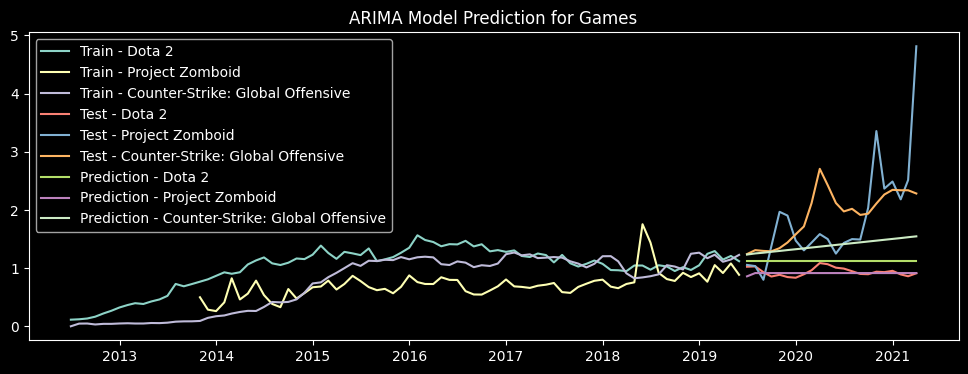

In [ ]:
fig, axes = plt.subplots(1, 1, figsize=(12, 4))

# 예측값을 담을 딕셔너리 초기화
predictions = {}

# Train 데이터
for game_name in df_tlsa_train.columns:
    plt.plot(df_tlsa_train.index, df_tlsa_train[game_name], label=f'Train - {game_name}')

# Test 데이터
for game_name in df_tlsa_test.columns:
    plt.plot(df_tlsa_test.index, df_tlsa_test[game_name], label=f'Test - {game_name}')

# Prediction 데이터
for game_name, model_fit in arima_models.items():
    tsla_pred = model_fit.predict(n_periods=len(df_tlsa_test))
    df_tsla_pred = pd.DataFrame(tsla_pred, index=df_tlsa_test.index, columns=['value'])
    predictions[game_name] = df_tsla_pred
    plt.plot(df_tsla_pred.index, df_tsla_pred['value'], label=f'Prediction - {game_name}')

plt.legend()
plt.title('ARIMA Model Prediction for Games')
plt.show()


## 매달 예측해서 예측 고도화하기
현재 모든 달이 비슷하게 예측되고 있다. 이는 ARIMA 모형(0,1,0), (0,1,2), (0,0,0) 등의 특성 때문인데, 의미있는 자기 상관(AR)이나 이동 평균(MA) 를 찾기 어려워 ARIMA 모형이 임의 보행 모형(Random Walk)을 따르고 마지막 관측치를 0에 가깝게 하여 반복적인 예측을 했기 때문이다.

따라서 한달씩 주가를 예측한다.

In [ ]:
#코드 12-26 수정
def monthly_predictions(model_fit, test_data):
    predictions = []
    for _ in range(30):  # 30일씩 예측
        pred_next = model_fit.predict(n_periods=1)
        predictions.append(pred_next.tolist()[0])
        model_fit.update(test_data)  # 여기서 test_data는 이전 예측값이 됩니다.
    return predictions

# 각 게임에 대한 ARIMA 모델을 사용하여 한달씩 예측
monthly_predictions_dict = {}
for game_name, model_fit in arima_models.items():
    if game_name != 'Among Us':  # Among Us는 제외
        print(f"\nMonthly Predictions for {game_name}...")
        initial_value = df_tlsa_test[game_name].iloc[0]  # 첫 번째 테스트 데이터로 초기화
        monthly_preds = monthly_predictions(model_fit, initial_value)
        monthly_predictions_dict[game_name] = monthly_preds

# 결과 출력
for game_name, monthly_preds in monthly_predictions_dict.items():
    print(f"\nMonthly Predictions for {game_name}:")
    print(monthly_preds)



Monthly Predictions for Dota 2...

Monthly Predictions for Project Zomboid...

Monthly Predictions for Counter-Strike: Global Offensive...

Monthly Predictions for Dota 2:
[1.1209713478670025, 1.0265702423564336, 1.0265702423564336, 1.0265702423564336, 1.0265702423564336, 1.0265702423564336, 1.0265702423564336, 1.0265702423564336, 1.0265702423564336, 1.0265702423564336, 1.0265702423564336, 1.0265702423564336, 1.0265702423564336, 1.0265702423564336, 1.0265702423564336, 1.0265702423564336, 1.0265702423564336, 1.0265702423564336, 1.0265702423564336, 1.0265702423564336, 1.0265702423564336, 1.0265702423564336, 1.0265702423564336, 1.0265702423564336, 1.0265702423564336, 1.0265702423564336, 1.0265702423564336, 1.0265702423564336, 1.0265702423564336, 1.0265702423564336]

Monthly Predictions for Project Zomboid:
[0.8610009079036506, 1.0305940815336843, 0.9775110940325342, 1.0148506481069959, 1.011571738853728, 1.024089181912379, 1.0279489099213874, 1.0338769172164688, 1.037497432037902, 1.0409

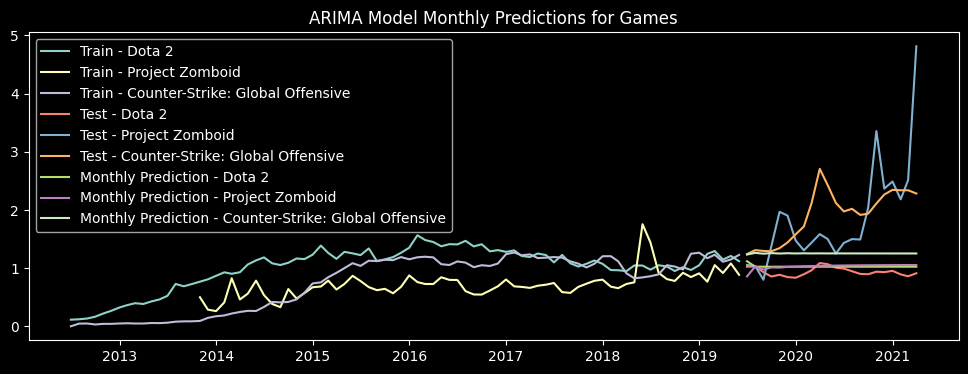

In [ ]:
# 코드 12-27 수정
fig, axes = plt.subplots(1, 1, figsize=(12, 4))

# Train 데이터
for game_name in df_tlsa_train.columns:
    plt.plot(df_tlsa_train.index, df_tlsa_train[game_name], label=f'Train - {game_name}')

# Test 데이터
for game_name in df_tlsa_test.columns:
    plt.plot(df_tlsa_test.index, df_tlsa_test[game_name], label=f'Test - {game_name}')

# Monthly Prediction 데이터
for game_name, monthly_preds in monthly_predictions_dict.items():
    # Monthly Prediction 데이터의 길이를 테스트 데이터에 맞춤
    monthly_preds = monthly_preds[:len(df_tlsa_test)]
    plt.plot(df_tlsa_test.index, monthly_preds, label=f'Monthly Prediction - {game_name}')

plt.legend()
plt.title('ARIMA Model Monthly Predictions for Games')
plt.show()


# 데이터 전처리


In [ ]:
# 평균 플레이어수가 10 이상인 게임만 선별
data = pd.read_csv('AllData.csv')
cutoff = 10
data = data.loc[data['mean']>10]

print('평균 플레이어수가 10 이상인 게임은 총 '+str(len(data))+'개 입니다')

평균 플레이어수가 10 이상인 게임은 총 5090개 입니다


In [ ]:
# Metacritic의 점수가 비어있는 데이터 제거
data = pd.read_csv('AllData.csv')
data = data.loc[data['Metacritic']>-1]

print('Metacritic의 점수가 존재하는 게임의 수는 '+str(len(data))+' 개 입니다.')

Metacritic의 점수가 존재하는 게임의 수는 2194 개 입니다.


In [ ]:
# 위 두 조건 and (평균플레이어 수 > 10 && Metacritic의 점수 존재)
data = pd.read_csv('AllData.csv')
data = data.loc[(data['mean']>10)&(data['Metacritic']>-1)]

print('평균플레이어 수 > 10 && Metacritic의 점수 존재인 게임의 수는  '+str(len(data))+' 개 입니다. ')

평균플레이어 수 > 10 && Metacritic의 점수 존재인 게임의 수는  1647 개 입니다. 


# EDA (탐색적 데이터 분석)

## 각 장르에서 4개의 게임 등급 분포

### 장르 열 이름 추출 및 변경
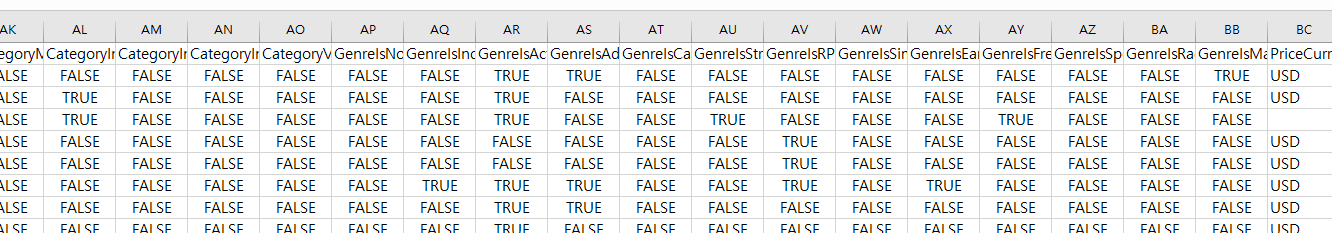

In [ ]:
data = pd.read_csv('AllData.csv')
data = data.loc[data['mean']>10]

data['GenreIsGame'] = 1 -data['GenreIsNonGame']  # GenreIsNonGame의 반대값 (false, true)
data['GenreIsGame'] = data['GenreIsGame'].astype('bool') # boolean으로 변경

genre = [#'GenreIsGame',
       'GenreIsIndie', 'GenreIsAction', 'GenreIsAdventure', 'GenreIsCasual',
       'GenreIsStrategy', 'GenreIsRPG', 'GenreIsSimulation',
       'GenreIsEarlyAccess', 'GenreIsFreeToPlay', 'GenreIsSports',
       'GenreIsRacing', 'GenreIsMassivelyMultiplayer']

genre_name = [#'IsGame',
       'Indie', 'Action', 'Adventure', 'Casual',
       'Strategy', 'RPG', 'Simulation',
       'EarlyAccess', 'Free', 'Sports',
       'Racing', 'MassivelyMultiplayer']

print(print('평균 플레이어수가 10 이상인 게임은 총 '+str(len(data))+'개 입니다'))

평균 플레이어수가 10 이상인 게임은 총 5090개 입니다
None


## 데이터를 4개의 등급으로 나누어 각 장르별 막대 그래프 생성

In [ ]:
def plot_grading(data, method, ranks, no_grades=4):
    data.sort_values(by=[method], ascending=False, inplace=True) # 데이터를 주어진 method열 기준 내림차순으로 정렬

    # 데이터를 등급으로 나누기 위한 등급 리스트 생성
    grade = list(range(1,len(ranks)+1))
    print(grade)

    a = np.array(ranks[1:]+[len(data)] ) - np.array([0] + ranks[1:]) # 각 등급에 해당하는 데이터 개수 계산
    print(a)

    grades = []
    for i in range(len(grade)):
        grades.append( [grade[i]]*a[i] )    # 각 등급별로 등급 리스트를 생성
    grades = list(chain(*grades)) # 2차원 리스트를 1차원 리스트로 평탄화
    data['grade'] = grades  # 데이터프레임에 새로운 'grade' 열 추가, 해당 열에 등급 정보 할당
    cutoffs=np.round(data.iloc[ranks][method].values,2)  # 각 등급의 기준이 되는 값 계산

    # 각 장르에 대한 데이터를 사용하여 등급별로 데이터 개수(b)와 퍼센트(b_perc) count
    b=[]
    b_perc=[]
    for j in range(len(genre)):
        sub_data = data.loc[data[genre[j]]==True]  # 현재 장르에 해당하는 행만 선택
        b.append( [len(sub_data.loc[sub_data['grade']==i]) for i in range(1,len(grade)+1)]) # 각 등급별로 데이터 개수를 세어 b 리스트에 추가
        b_perc.append(np.array(b[j])/len(sub_data) ) # 등급별 데이터 개수 / 해당 장르의 전체 데이터  => 퍼센트 계산

    # b와 b_perc 리스트로 DataFrame new_df, perc_df 생성, 열: 등급, 행: 장르
    new_df = pd.DataFrame(b, columns=["Grade 1 (>"+str(cutoffs[0])+")", "Grade 2 ("+str(cutoffs[1])+"~"+str(cutoffs[0])+")",
                                  "Grade 3 ("+str(cutoffs[2])+"~"+str(cutoffs[1])+")", "Grade 4 (<"+str(cutoffs[2])+")"], index =genre_name)
    perc_df = pd.DataFrame(b_perc, columns=["Grade 1 (>"+str(cutoffs[0])+")", "Grade 2 ("+str(cutoffs[1])+"~"+str(cutoffs[0])+")",
                                  "Grade 3 ("+str(cutoffs[2])+"~"+str(cutoffs[1])+")", "Grade 4 (<"+str(cutoffs[2])+")"], index =genre_name)


    print(new_df)
    print(perc_df)


    ax = new_df.plot.barh(stacked=True, title=str(method) + '에 따른 등급화')

    ax = perc_df.plot.barh(stacked=True, title='게임 비율 (' + str(method) + ' 기준)')

## mean 열 기준

[1, 2, 3, 4]
[1273 1273 1273 1271]
                      Grade 1 (>470328.38)  Grade 2 (182.47~470328.38)  \
Indie                                  437                         605   
Action                                 628                         527   
Adventure                              367                         393   
Casual                                 169                         236   
Strategy                               368                         422   
RPG                                    381                         368   
Simulation                             347                         369   
EarlyAccess                            196                         183   
Free                                   265                         206   
Sports                                  89                          71   
Racing                                  46                          51   
MassivelyMultiplayer                   170                          99   

  

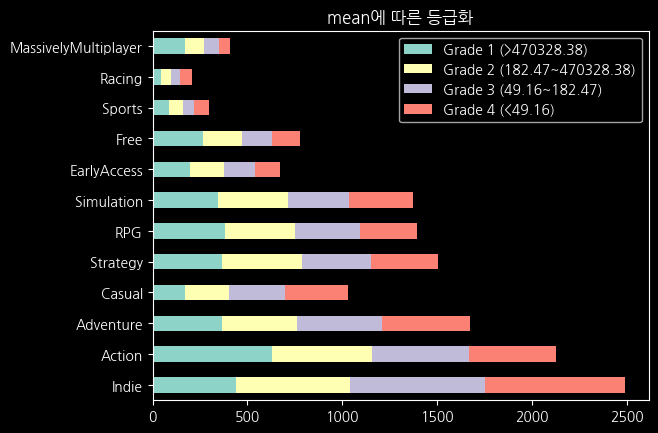

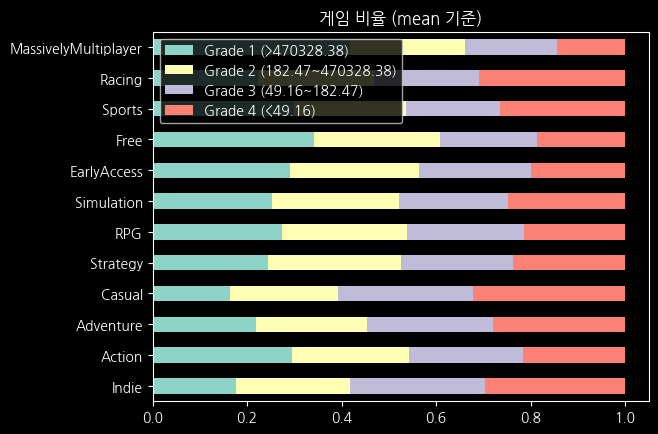

In [ ]:
no_grades=4
ranks = list(np.arange(0,len(data), int(len(data)/no_grades)+1))

# mean 열(플레이어수 평균값)을 기준으로 4개등급의 장르별 막대 그래프 출력
plot_grading(data,'mean',ranks)

## Metacritic 기준

[0, 412, 824, 1236]
Metacritic 점수가 존재하고 평균 플레이어수가 10 이상인 게임의 수는 1647개 입니다
[1, 2, 3, 4]
[412 412 412 411]
                      Grade 1 (>96)  Grade 2 (82~96)  Grade 3 (76~82)  \
Indie                           157              164              181   
Action                          231              205              213   
Adventure                       146              157              160   
Casual                           28               34               34   
Strategy                         72              110              137   
RPG                              97              115              105   
Simulation                       58               60               84   
EarlyAccess                       9               10               18   
Free                             15               15               12   
Sports                           21               19               24   
Racing                           18               18               17   
MassivelyMultiplaye

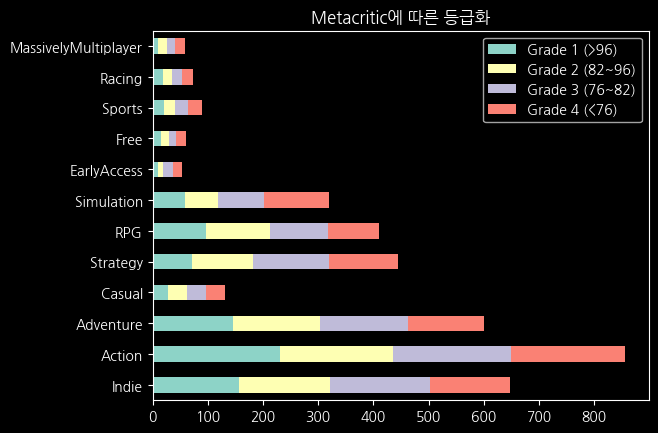

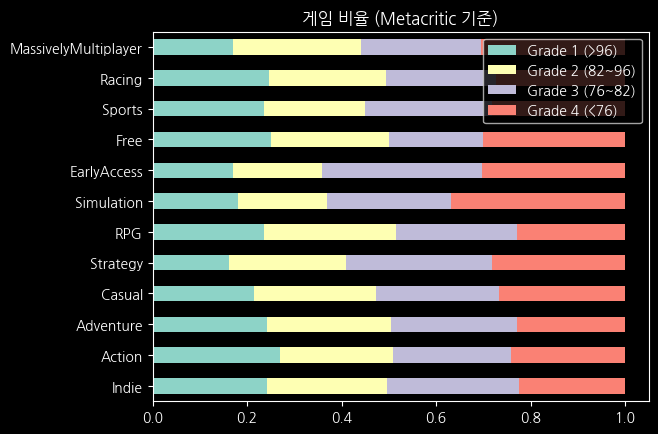

In [ ]:
data = pd.read_csv('AllData.csv')
data = data.loc[(data['mean']>10)&(data['Metacritic']>-1)]
no_grades=4
ranks = list(np.arange(0,len(data), int(len(data)/no_grades)+1))
print(ranks)
print('Metacritic 점수가 존재하고 평균 플레이어수가 10 이상인 게임의 수는 '+str(len(data))+'개 입니다')
plot_grading(data,'Metacritic',ranks)

## 각 등급에서 장르들의 분포
주어진 등급 기준에 따라 게임들을 등급화하고, 등급에 따른 평균값을 그래프로 확인

In [ ]:
data = pd.read_csv('AllData.csv')
data = data.loc[(data['mean']>10)&(data['Metacritic']>-1)]

In [ ]:
#standard: a column name used to rank the games
#ranks: a list of rank cutoffs

def grade_analysis(ranks,standard='max', plot_cutoff=False,plot_figures=True,fig_size=(12,12)):

    grade = list(range(1,len(ranks)+1))
    print('grade: ')
    print(grade)
    a = np.array(ranks[1:]+[len(data)] ) - np.array( [0] + ranks[1:]) #  등급의 경계 지점을 계산 *리스트의 두 번째 요소부터 마지막까지 선택
    print('a: ')
    print(a)

    # 등급과 등급의 경계 지점을 매핑
    grades = []
    for i in range(len(grade)):
        grades.append( [grade[i]]*a[i] )
    grades = list(chain(*grades))

    # 기준 열을 기준으로 내림차순으로 정렬
    data_copy=data.copy()
    data_copy.sort_values(by=[standard], ascending=False, inplace=True)#.reset_index(drop=True)
    avg_graded = data_copy#.loc[data[standard]>=1].copy()

    # Rank the games
    if plot_cutoff:
        print('Using '+str(standard)+' :')
        for i in ranks:
            print('The cutoff for top '+str(i)+' games is '+str(avg_graded.reset_index(drop=True)[standard][i]))

    # cutoffs 에 각 등급의 경계 지점을 저장
    cutoffs = [0] + [avg_graded.reset_index(drop=True)[standard][i] for i in ranks[::-1]]
    #counts  = avg_graded[standard].value_counts(bins=cutoffs, sort=False,dropna=False)
    #print(counts)

    #avg_graded = avg_players.loc[avg_players[standard]>=1].copy()
    avg_graded['Grade'] = grades

    data_clean = avg_graded[genre+['Grade']]

#threshold = .2
#data_clean = data_clean.drop(data_clean.mean(axis=0)[data_clean.mean(axis=0) < threshold].index.values,axis=1)

    data_clean.columns = genre_name+['Grade']

    data_test = {}
    for i in grade:
        data_test[i] = data_clean.loc[data_clean['Grade']==i].drop(columns=['Grade'])

    if plot_figures:
        plt.figure(figsize=fig_size)
        for i in grade:
            plt.plot(data_test[i].columns,data_test[i].mean(),label='Grade '+str(i))

        plt.legend()
        plt.title('By max of Avg_players')
        plt.show()
    return data_test

grade: 
[1, 2, 3, 4]
a: 
[  50   50  400 1147]


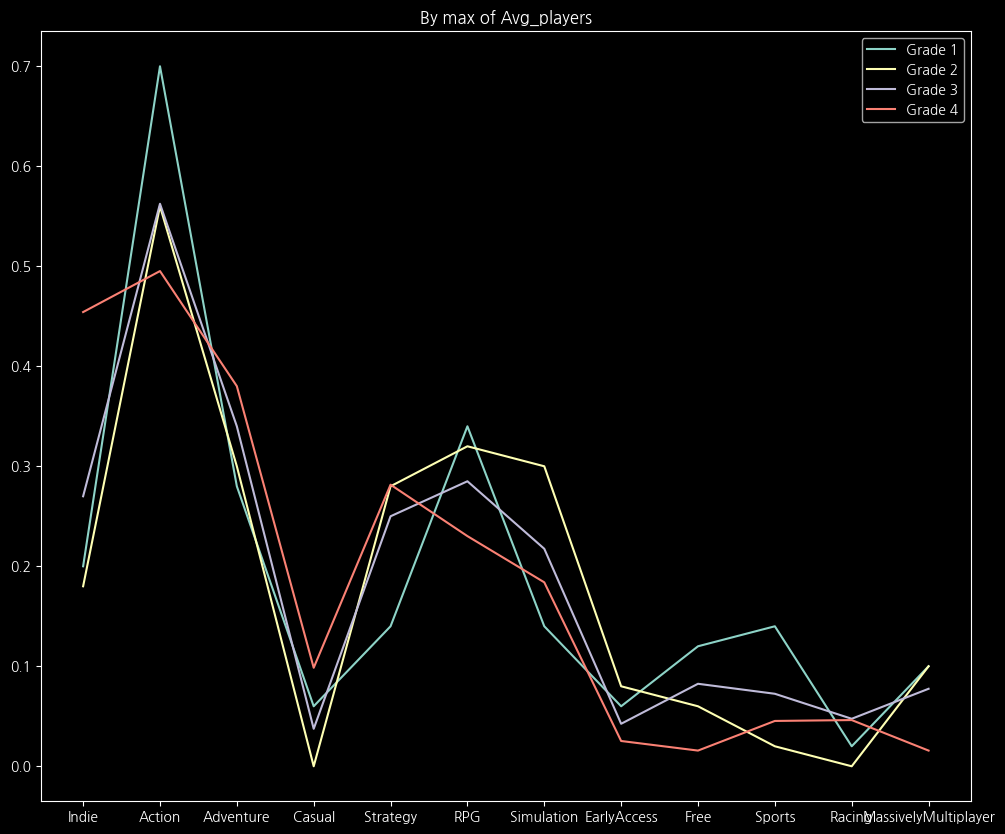

In [ ]:
# We plot one figure given one ranking method here:
fig_size=(12,10)
ranks = [0,50,100,500]
data_max = grade_analysis(ranks,standard='max', plot_cutoff=False,plot_figures=True,fig_size=fig_size)

In [ ]:
# This function plots different methods together:
def grade_analysis_plot_all(methods,ranks,fig_size=(24,6)):
    fig,ax=plt.subplots(1,len(methods),figsize=fig_size)
    for j in range(len(methods)):
        data_copy = grade_analysis(ranks,standard= methods[j], plot_figures=False)
        for i in list(range(1,len(ranks)+1)):
            ax[j].plot(data_copy[i].columns,data_copy[i].mean(),label='Grade '+str(i))
            ax[j].set_title('By '+str(methods[j]))
        ax[j].legend()
    plt.show()

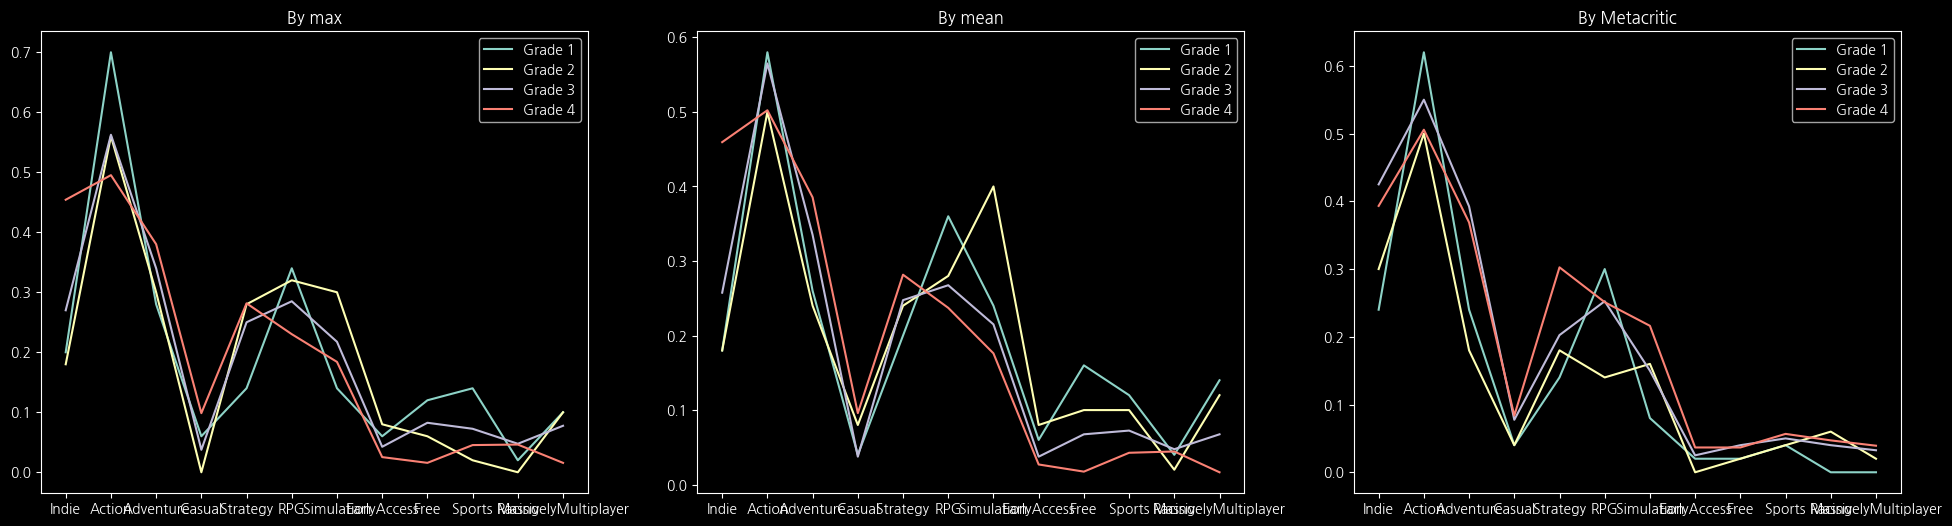

Rank cutoffs are [0, 50, 100, 500]


In [ ]:
methods = ['max','mean','Metacritic']
ranks = [0,50,100,500]
grade_analysis_plot_all(methods,ranks,fig_size=(24,6))
print('Rank cutoffs are '+str(ranks))

# For continuous variables

scatter plot 행렬 차트


In [ ]:
data=pd.read_csv('AllData.csv')
data = data.loc[(data['mean']>10)&(data['Metacritic']>-1)]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1647 entries, 0 to 6761
Data columns (total 81 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   App_id                       1647 non-null   int64  
 1   Name                         1647 non-null   object 
 2   ReleaseDate                  1647 non-null   object 
 3   RequiredAge                  1647 non-null   int64  
 4   DemoCount                    1647 non-null   int64  
 5   DeveloperCount               1647 non-null   int64  
 6   DLCCount                     1647 non-null   int64  
 7   Metacritic                   1647 non-null   int64  
 8   MovieCount                   1647 non-null   int64  
 9   PackageCount                 1647 non-null   int64  
 10  RecommendationCount          1647 non-null   int64  
 11  PublisherCount               1647 non-null   int64  
 12  ScreenshotCount              1647 non-null   int64  
 13  SteamSpyOwners    

## 산점도 그래프 - 특성 간 상관관계와 레이블 분포
'SteamSpyOwnersNew', 'ScreenshotCount', 'RecommendationCount', 'AchievementCount', 'DLCCount', 'MovieCount', 'mean' 열에 대한 비교

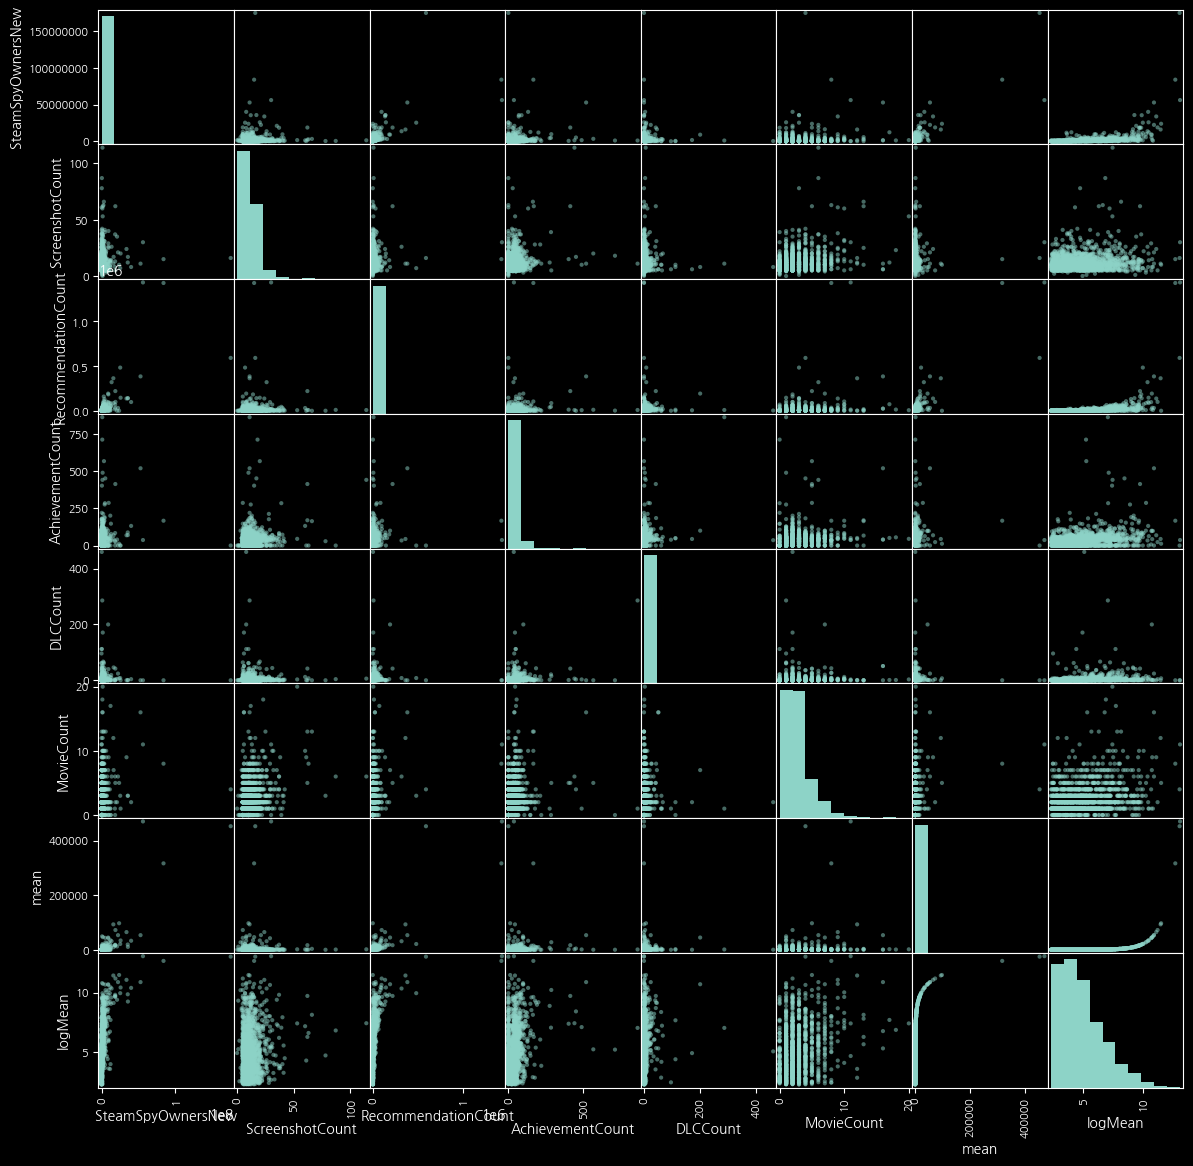

In [ ]:
data_test = data[[ 'SteamSpyOwnersNew','ScreenshotCount', 'RecommendationCount',
                  'AchievementCount', #'AchievementHighlightedCount',
        'DLCCount', 'MovieCount','mean',
                 #'Metacritic'
                 ]].astype(float).copy()  # float형으로 변환

# 'mean' 열의 값들에 대한 로그 변환 후 'logMean' 열 생성
data_test['logMean']=np.log(data_test['mean'])
scatter_matrix(data_test,figsize=(14,14))
plt.show()

## 범주형 변수에 대한 히스토그램과 밀도 그래프 출력

In [ ]:
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import seaborn as sns

In [ ]:
data = pd.read_csv('AllData.csv')
data = data.loc[(data['mean']>10)&(data['Metacritic']>-1)]

data['GenreIsGame'] = 1 -data['GenreIsNonGame']
data['GenreIsGame'] = data['GenreIsGame'].astype('bool')

genre = [#'GenreIsGame',
       'GenreIsIndie', 'GenreIsAction', 'GenreIsAdventure', 'GenreIsCasual',
       'GenreIsStrategy', 'GenreIsRPG', 'GenreIsSimulation',
       'GenreIsEarlyAccess', 'GenreIsFreeToPlay', 'GenreIsSports',
       'GenreIsRacing', 'GenreIsMassivelyMultiplayer']

genre_name = [#'IsGame',
       'Indie', 'Action', 'Adventure', 'Casual',
       'Strategy', 'RPG', 'Simulation',
       'EarlyAccess', 'Free', 'Sports',
       'Racing', 'MassivelyMultiplayer']
genre_name+['mean']

['Indie',
 'Action',
 'Adventure',
 'Casual',
 'Strategy',
 'RPG',
 'Simulation',
 'EarlyAccess',
 'Free',
 'Sports',
 'Racing',
 'MassivelyMultiplayer',
 'mean']

## 다중 히스토그램
대부분의 게임 장르가 Action을 포함하고 있는 것을 알 수 있음 <br>
인디, 액션, 어드벤쳐 장르가 압도적으로 많음

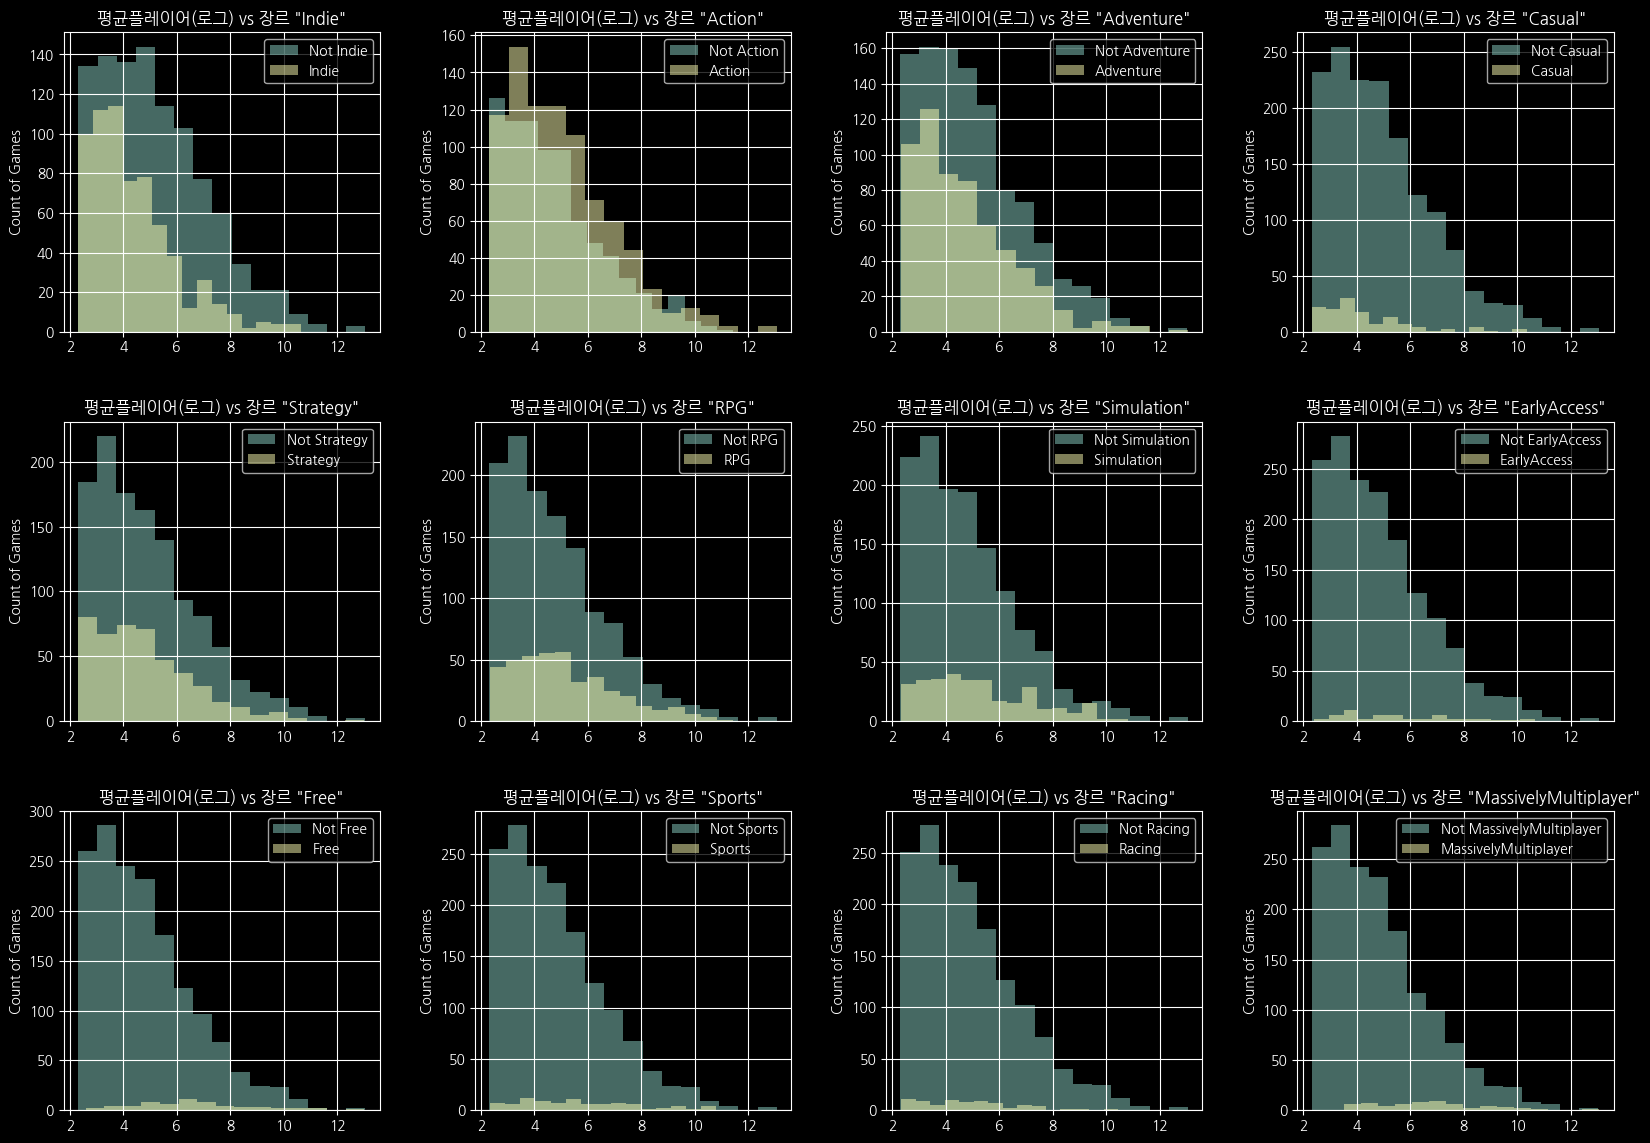

In [ ]:
df=data[genre+['mean']].copy()
df['mean']=np.log(df['mean'])
n = len(genre)
n_x = 3
n_y = int(n/n_x)
fig,ax=plt.subplots(n_x,n_y,figsize=(20,14))
for i in range(n_x):
    for j in range(n_y):
        df[df[genre[i+j+i*n_x]]==0].hist(column=["mean"], bins=15, alpha=0.5, label='Not '+str(genre_name[i+j+i*n_x]),ax=ax[i,j])   # 해당 장르에 속하지 않는 게임들의 로그 변환된 평균 플레이어 수에
        df[df[genre[i+j+i*n_x]]==1].hist(column=["mean"], bins=15, alpha=0.5, label=genre_name[i+j+i*n_x],ax=ax[i,j]) # 해당 장르에 속하는 게임들의 로그 변환된 평균 플레이어 수
        ax[i,j].set_ylabel('Count of Games')
        ax[i,j].set_xlabel('')
        ax[i,j].legend()
        ax[i, j].set_title('평균플레이어(로그) vs 장르 "'+ str(genre_name[i+j+i*n_x]) + '"')

plt.show()


## 확률 밀도 그래프

genre에 대해 해당하는 게임들과 그렇지 않은 게임들의 평균값에 대한 확률 밀도 추정 그래프



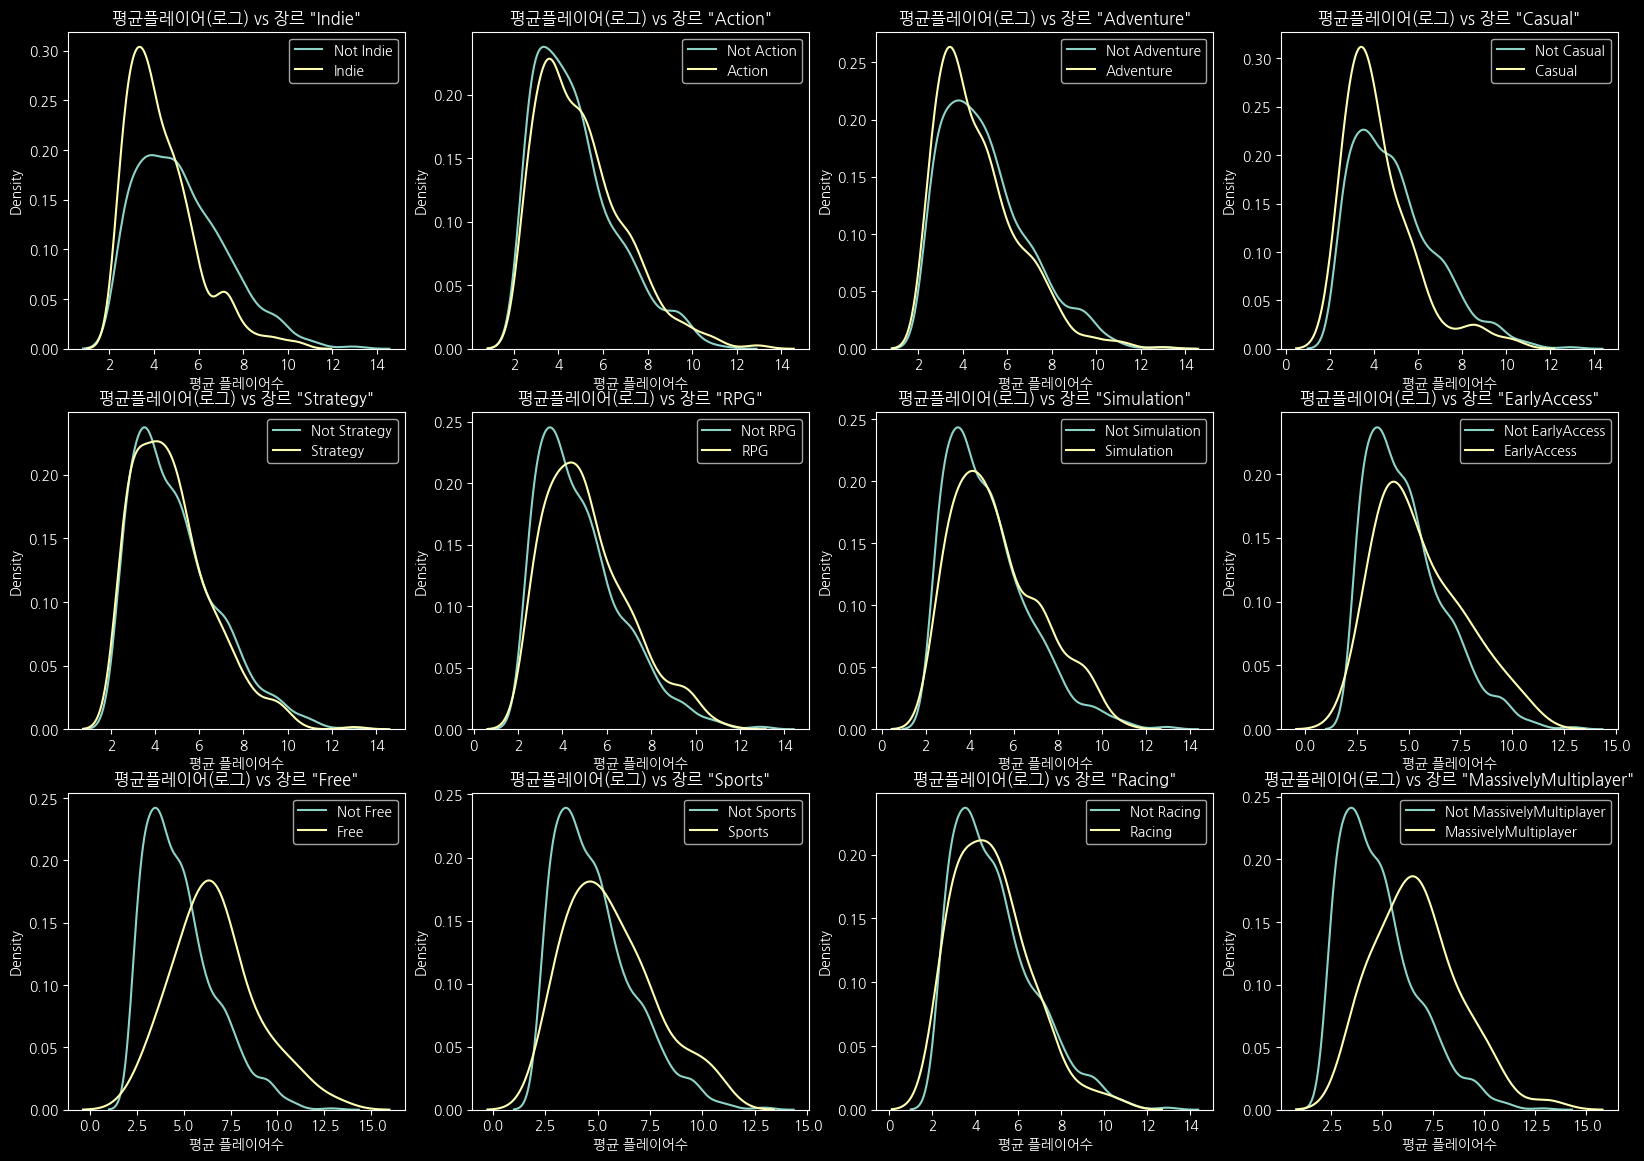

In [ ]:
fig,ax=plt.subplots(n_x,n_y,figsize=(20,14))
for i in range(n_x):
    for j in range(n_y):
        sns.kdeplot(df[df[genre[i+j+i*n_x]]==0]["mean"],label='Not '+str(genre_name[i+j+i*n_x]),ax=ax[i,j])  # genre에 속하지 않는 게임들의 평균값에 대한 밀도 추정 그래프
        sns.kdeplot(df[df[genre[i+j+i*n_x]]==1]["mean"],label=genre_name[i+j+i*n_x],ax=ax[i,j])   # genre에 속하는 게임들의 평균값에 대한 밀도 추정 그래프
        ax[i,j].set_ylabel('Density')
        ax[i,j].set_xlabel('평균 플레이어수')
        ax[i,j].legend()
        ax[i, j].set_title('평균플레이어(로그) vs 장르 "' + str(genre_name[i+j+i*n_x]) + '"')


plt.legend()
plt.show()

## 코로나 이후의 데이터 제거 및 다시 분석

In [ ]:
ex_cols =  ['April 2021','March 2021','February 2021','January 2021',
            'December 2020','November 2020','October 2020','September 2020',
            'August 2020','July 2020','June 2020','May 2020','April 2020',
            'March 2020','February 2020','January 2020','December 2019',
            'November 2019','October 2019','September 2019','August 2019','July 2019',]
steamCharts = steamCharts[[col for col in steamCharts.columns if col not in ex_cols]]

steamCharts.head()

,Name,App_id,Avg_Players,Gain,Perc_Gain,Peak_Players,Last 30 Days,June 2019,May 2019,April 2019,...,April 2013,March 2013,February 2013,January 2013,December 2012,November 2012,October 2012,September 2012,August 2012,July 2012
0,Counter-Strike: Global Offensive,730,1.0,0.0,0.0,0.0,694478.21,389376.72,364417.31,351989.92,...,16006.0,15959.89,17372.73,16164.22,14079.39,14134.1,10739.48,16000.75,15475.39,932.57
1,Counter-Strike: Global Offensive,730,0.0,1.0,0.0,0.0,-28868.3,24959.42,12427.39,-38250.24,...,46.11,-1412.84,1208.51,2084.83,-54.71,3394.62,-5261.27,525.36,14542.81,NaN
2,Counter-Strike: Global Offensive,730,0.0,0.0,1.0,0.0,-3.99,+6.85,3.53,-9.80,...,+0.29,-8.13,+7.48,+14.81,-0.39,+31.61,-32.88,+3.39,+1559.43,NaN
3,Counter-Strike: Global Offensive,730,0.0,0.0,0.0,1.0,1119102,587724,588453.00,621614,...,31966,32166,35238,31359,27553,50533,20850,36057,52261,1642.00
4,Dota 2,570,1.0,0.0,0.0,0.0,412538.77,507528.44,548523.18,520218.98,...,174835.73,180878.9,166972.97,147748.14,121924.42,101077.43,75965.44,61867.68,55768.61,52721.05


In [ ]:
# Get Avg_Players. (Avg_Players=1인 즉, Avg_players를 나타낸 행들 추출)
avg_players = steamCharts.loc[steamCharts['Avg_Players']==1]
avg_players = avg_players.drop(columns=['Avg_Players', 'Gain', 'Perc_Gain', 'Peak_Players','Last 30 Days'])
avg_pure = avg_players.drop(columns=['App_id', 'Name']).astype(float)  # App_id, Name 컬럼 제거 및 나머지 열 데이터 타입 float로 변경

# Get Peak_Players.
peak_players = steamCharts.loc[steamCharts['Peak_Players']==1]
peak_players = peak_players.drop(columns=['Avg_Players', 'Gain', 'Perc_Gain', 'Peak_Players','Last 30 Days'])
peak_pure = peak_players.drop(columns=['App_id', 'Name']).astype(float)

# Get Perc_Gain.
p_gain = steamCharts.loc[steamCharts['Perc_Gain']==1]
p_gain = p_gain.drop(columns=['Avg_Players', 'Gain', 'Perc_Gain', 'Peak_Players','Last 30 Days'])
p_gain_pure = p_gain.drop(columns=['App_id', 'Name']).astype(float)

# Get Gain.
gain = steamCharts.loc[steamCharts['Gain']==1]
gain = gain.drop(columns=['Avg_Players', 'Gain', 'Perc_Gain', 'Peak_Players','Last 30 Days'])
gain_pure = gain.drop(columns=['App_id', 'Name']).astype(float)

In [ ]:
# Avg_Players 행 특정 게임 출력 테스트
avg_players=avg_players.reset_index(drop=True)
game_index=[]
game_index.append(avg_players[avg_players['Name']=='Among Us'].index[0])
game_index.append(avg_players[avg_players['Name']=='Dota 2'].index[0])
game_index.append(avg_players[avg_players['Name']=='Project Zomboid'].index[0])
game_index.append(avg_players[avg_players['Name']=='Counter-Strike: Global Offensive'].index[0])

avg_players.iloc[game_index]

,Name,App_id,June 2019,May 2019,April 2019,March 2019,February 2019,January 2019,December 2018,November 2018,...,April 2013,March 2013,February 2013,January 2013,December 2012,November 2012,October 2012,September 2012,August 2012,July 2012
84,Among Us,945360,74.85,8.18,7.19,4.50,5.37,4.65,2.57,2.25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Dota 2,570,507528.44,548523.18,520218.98,586505.85,564909.67,475747.00,439367.83,461073.48,...,174835.73,180878.9,166972.97,147748.14,121924.42,101077.43,75965.44,61867.68,55768.61,52721.05
127,Project Zomboid,108600,728.64,888.78,753.92,865.02,631.23,749.30,696.70,756.88,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,Counter-Strike: Global Offensive,730,389376.72,364417.31,351989.92,390240.16,371358.96,401366.87,395509.26,310085.43,...,16006.0,15959.89,17372.73,16164.22,14079.39,14134.1,10739.48,16000.75,15475.39,932.57


In [ ]:
plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False #축의 음수 기호 표시

June 2019         74.85
May 2019           8.18
April 2019         7.19
March 2019         4.50
February 2019      5.37
                  ...  
November 2012       NaN
October 2012        NaN
September 2012      NaN
August 2012         NaN
July 2012           NaN
Name: 336, Length: 84, dtype: float64
mean : 13.695
June 2019         507528.44
May 2019          548523.18
April 2019        520218.98
March 2019        586505.85
February 2019     564909.67
                    ...    
November 2012     101077.43
October 2012       75965.44
September 2012     61867.68
August 2012        55768.61
July 2012          52721.05
Name: 4, Length: 84, dtype: float64
mean : 459787.6010714284
June 2019         728.64
May 2019          888.78
April 2019        753.92
March 2019        865.02
February 2019     631.23
                   ...  
November 2012        NaN
October 2012         NaN
September 2012       NaN
August 2012          NaN
July 2012            NaN
Name: 508, Length: 84, dtype: float64
me

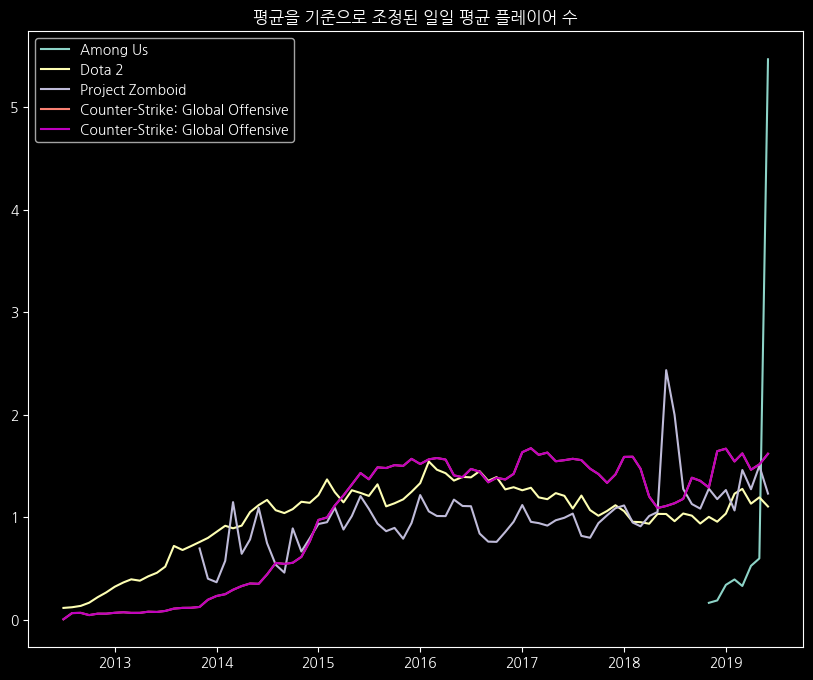

In [ ]:
# 'Name' 및 'App_id' 열을 제외하고, 열 이름을 날짜 형식으로 변환
# 시각화 결과 : 코로나가 시작된 시점 이후로 해당 게임들 모두 일 평균 플레이어 수가 급증하기 시작하였다. 그 중에서 어몽어스가 1위로 가장 많이 증가한 게임이다. 다만 꾸준히 우상향하는 추세를 가진 게임은 프로젝트 좀비이다.
months= pd.to_datetime(avg_players.drop(columns=['Name','App_id']).columns)
fig=plt.figure(figsize=(10,8))

for i in game_index:
    plot_data=avg_pure.iloc[i]/avg_pure.iloc[i].mean() # 각 게임의 평균을 기준으로 조정된 데이터를 계산해 plot_data에 저장
    print(avg_pure.iloc[i])
    print('mean : ' + str(avg_pure.iloc[i].mean()))
    plt.plot(months,plot_data,label = avg_players.Name[i]) # 플롯에 데이터 추가 및 게임 이름 표시

# 데이터셋의 0번째 인덱스 게임 추가
plt.plot(months,avg_pure.iloc[0]/avg_pure.iloc[0].mean(),'m',label = avg_players.Name[0])
plt.title('평균을 기준으로 조정된 일일 평균 플레이어 수')

# 코로나 시작 지점 표시
#plt.vlines(pd.to_datetime('March 2020'),0,3,linestyles='dashed',label='Start of Pandemic')
plt.legend() # 범례
plt.show()


# 인공지능 시계열 예측 - 최적 ARIMA 모형

학습 덷이터, 테스트 데이터 나누기

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 주어진 코드에서 필요한 부분을 가져와 사용
months = pd.to_datetime(avg_players.drop(columns=['Name', 'App_id']).columns)
fig = plt.figure(figsize=(10, 8))

# ... (주어진 코드에서 필요한 부분)

# 학습 데이터와 테스트 데이터를 나누기
train_size = int(0.8 * len(months))
df_tlsa_train = pd.DataFrame()
df_tlsa_test = pd.DataFrame()

# 학습 데이터: 80% 이전의 데이터
df_tlsa_train['date'] = months[-train_size:][::-1]
for i in game_index:
    # Among Us 제외
    if avg_players.Name[i] != 'Among Us':
        plot_data = avg_pure.iloc[i] / avg_pure.iloc[i].mean()
        df_tlsa_train[avg_players.Name[i]] = plot_data.values[-train_size:][::-1]

# 테스트 데이터: 나머지 20%의 데이터
df_tlsa_test['date'] = months[:-train_size][::-1]
for i in game_index:
    # Among Us 제외
    if avg_players.Name[i] != 'Among Us':
        plot_data = avg_pure.iloc[i] / avg_pure.iloc[i].mean()
        df_tlsa_test[avg_players.Name[i]] = plot_data.values[:-train_size][::-1]

# 날짜 열을 인덱스로 설정
df_tlsa_train.set_index('date', inplace=True)
df_tlsa_test.set_index('date', inplace=True)

# 결과 출력
print("학습 데이터:")
print(df_tlsa_train.head())
print("\n테스트 데이터:")
print(df_tlsa_test.head())


학습 데이터:
              Dota 2  Project Zomboid  Counter-Strike: Global Offensive
date                                                                   
2012-07-01  0.114664              NaN                          0.003875
2012-08-01  0.121292              NaN                          0.064302
2012-09-01  0.134557              NaN                          0.066485
2012-10-01  0.165219              NaN                          0.044624
2012-11-01  0.219835              NaN                          0.058729

테스트 데이터:
              Dota 2  Project Zomboid  Counter-Strike: Global Offensive
date                                                                   
2018-02-01  0.954457         0.947453                          1.589152
2018-03-01  0.951009         0.910562                          1.472032
2018-04-01  0.935956         1.011108                          1.201146
2018-05-01  1.031620         1.049990                          1.089349
2018-06-01  1.030693         2.433595         

<Figure size 1000x800 with 0 Axes>

학습 데이터, 테스트 데이터 시각화

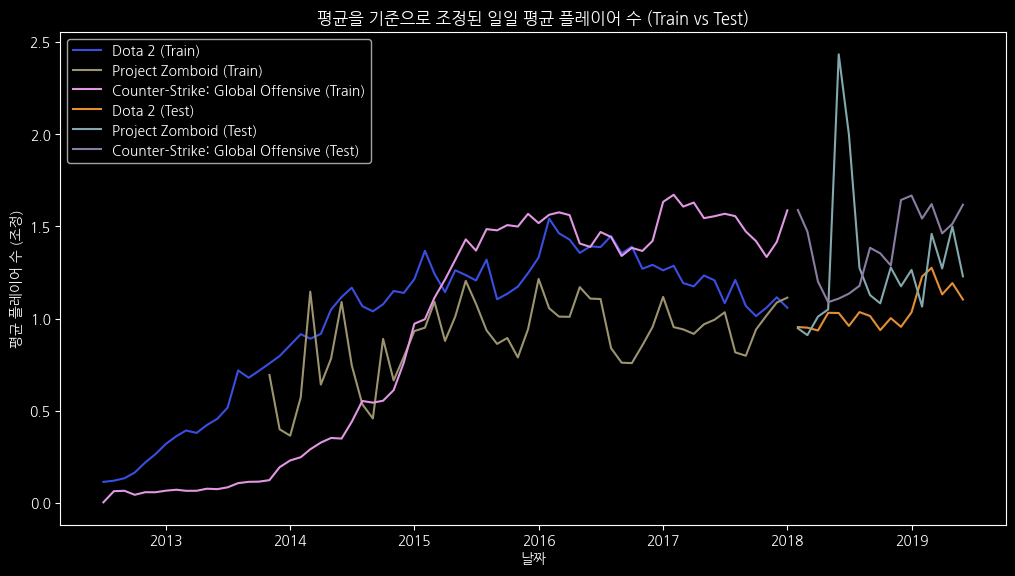

In [ ]:
import matplotlib.pyplot as plt
import random
# 시각화 결과 : 2019년 7월 1일을 기준으로 훈련데이터와 테스트 데이터를 분리하여 시각화하였다.
# 학습 데이터와 테스트 데이터를 plt plot으로 나타내기
plt.figure(figsize=(12.2, 6.4))

# 학습 데이터 플롯
for column in df_tlsa_train.columns:
    color = (random.random(), random.random(), random.random())  # 랜덤한 RGB 값을 생성하여 색상으로 사용
    plt.plot(df_tlsa_train.index, df_tlsa_train[column], label=column + ' (Train)', color=color)

# 테스트 데이터 플롯
for column in df_tlsa_test.columns:
    color = (random.random(), random.random(), random.random())  # 랜덤한 RGB 값을 생성하여 색상으로 사용
    plt.plot(df_tlsa_test.index, df_tlsa_test[column], label=column + ' (Test)', color=color)

plt.title('평균을 기준으로 조정된 일일 평균 플레이어 수 (Train vs Test)')
plt.xlabel('날짜')
plt.ylabel('평균 플레이어 수 (조정)')
#plt.vlines(pd.to_datetime('March 2020'), 0, 3, linestyles='dashed', label='Start of Pandemic', colors='r')
plt.legend()
plt.show()


In [ ]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 12.5 MB/s eta 0:00:00


In [ ]:
from pmdarima.arima.utils import ndiffs
import pandas as pd

def find_diff_order(data):
    adf_diffs = {}
    kpss_diffs = {}
    pp_diffs = {}

    for column in data.columns:
        # 결측치를 평균값으로 대체
        column_data = data[column].fillna(data[column].mean())

        adf_diffs[column] = ndiffs(column_data, test='adf')
        kpss_diffs[column] = ndiffs(column_data, test='kpss')
        pp_diffs[column] = ndiffs(column_data, test='pp')

    return adf_diffs, kpss_diffs, pp_diffs

# 예시 사용법
adf_diffs, kpss_diffs, pp_diffs = find_diff_order(df_tlsa_train)
print("최적의 차분 횟수 (ADF):")
print(adf_diffs)
print("\n최적의 차분 횟수 (KPSS):")
print(kpss_diffs)
print("\n최적의 차분 횟수 (PP):")
print(pp_diffs)


최적의 차분 횟수 (ADF):
{'Dota 2': 1, 'Project Zomboid': 1, 'Counter-Strike: Global Offensive': 2}

최적의 차분 횟수 (KPSS):
{'Dota 2': 2, 'Project Zomboid': 1, 'Counter-Strike: Global Offensive': 1}

최적의 차분 횟수 (PP):
{'Dota 2': 1, 'Project Zomboid': 0, 'Counter-Strike: Global Offensive': 1}


# ARIMA 모형 탐색


In [ ]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

# ARIMA 모델 탐색 및 학습 함수
def train_arima_model(series, d=1, max_p=4, max_q=4, m=12):
    model_fit = pm.auto_arima(
        y=series.fillna(series.mean()),  # 결측치를 평균 값으로 대체
        #d=d,
        #start_p=0, max_p=max_p,
        #start_q=0, max_q=max_q,
        seasonal=True,  # 데이터에 계절성이 없음
        #stepwise=True,
        trace=True
    )
    return model_fit

# 각 게임에 대한 ARIMA 모델을 학습하고 결과를 저장
arima_models = {}

for game_name in df_tlsa_train.columns:
    if game_name != 'Among Us':  # Among Us는 제외
        print(f"\nTraining ARIMA model for {game_name}...")
        model_fit = train_arima_model(df_tlsa_train[game_name])
        arima_models[game_name] = model_fit

# 학습된 ARIMA 모델 결과 출력
for game_name, model_fit in arima_models.items():
    print(f"\nARIMA Model Summary for {game_name}:")
    print(model_fit.summary())



Training ARIMA model for Dota 2...
Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=-137.187, Time=0.47 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-89.892, Time=0.03 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=-109.994, Time=0.07 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=-137.951, Time=0.08 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=-138.147, Time=0.15 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=-137.435, Time=0.08 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=-137.461, Time=0.13 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=-138.993, Time=0.10 sec
 ARIMA(0,2,3)(0,0,0)[0]             : AIC=-138.616, Time=0.07 sec
 ARIMA(1,2,3)(0,0,0)[0]             : AIC=-136.589, Time=0.17 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec

Best model:  ARIMA(0,2,2)(0,0,0)[0]          
Total fit time: 1.515 seconds

Training ARIMA model for Project Zomboid...
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   

## 최적 ARIMA 모형으로 예측

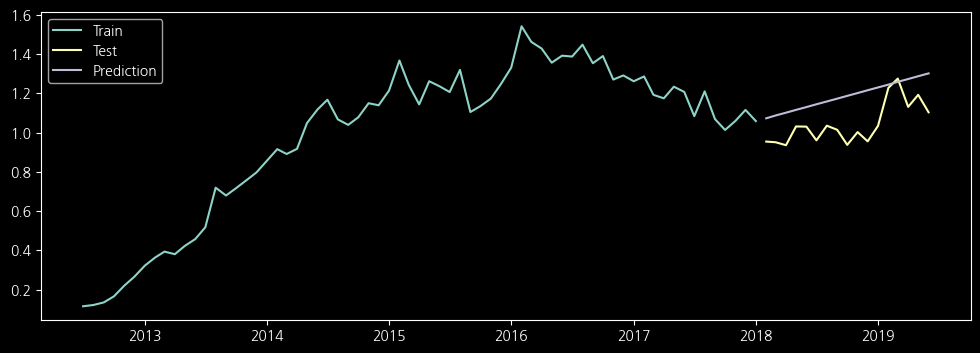

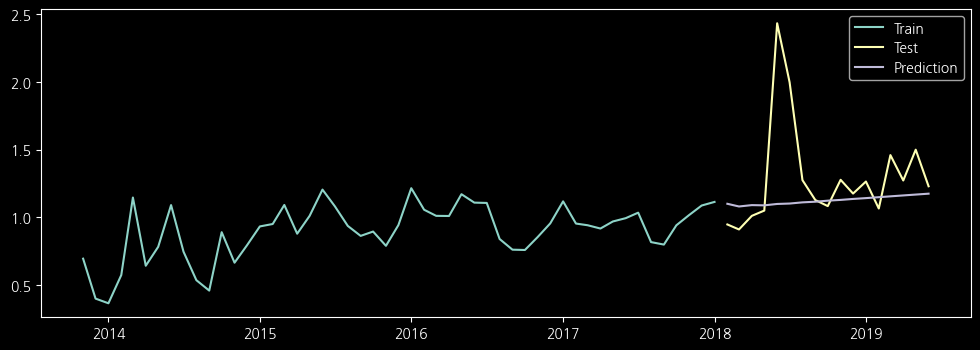

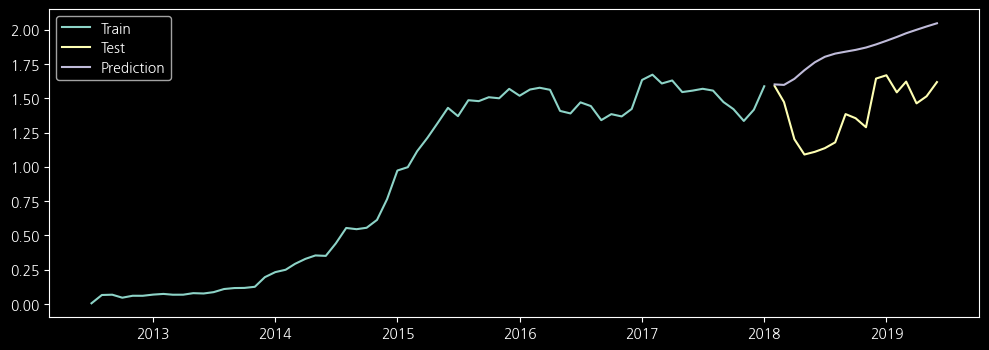

In [ ]:
for game_name in df_tlsa_train.columns:
  if game_name != 'Among Us':
    stepwise_model = pm.auto_arima(df_tlsa_train[game_name].fillna(df_tlsa_train[game_name].mean()),
                                  d = 1,
                                  start_p = 0,
                                  start_q = 0,
                                  max_p = 7,
                                  max_q = 7,
                                  seasonal=False,
                                  suppress_warnings=True,
                                  stepwise=False)
    stepwise_model.fit(df_tlsa_train[game_name])

    # 테스트 데이터 개수만큼 예측
    y_predict = stepwise_model.predict(n_periods=len(df_tlsa_test[game_name]))
    y_predict = pd.DataFrame(y_predict,index = df_tlsa_test[game_name].index,columns=['Prediction'])

    # 그래프
    fig, axes = plt.subplots(1, 1, figsize=(12, 4))
    plt.plot(df_tlsa_train[game_name], label='Train')        # 훈련 데이터
    plt.plot(df_tlsa_test[game_name], label='Test')          # 테스트 데이터
    plt.plot(y_predict, label='Prediction')  # 예측 데이터
    plt.legend()
    plt.show()

In [ ]:
# 최적 ARIMA 모델로 예측 함수
def predict_arima_model(model_fit, test_data):
    # 예측 수행
    pred = model_fit.predict(n_periods=len(test_data))
    df_pred = pd.DataFrame(pred, index=test_data.index, columns=['value'])
    return df_pred

# 각 게임에 대한 ARIMA 모델을 사용하여 예측 수행
predictions = {}

for game_name, model_fit in arima_models.items():
    if game_name != 'Among Us':  # Among Us는 제외
        print(f"\nPredicting for {game_name}...")
        df_pred = predict_arima_model(model_fit, df_tlsa_test[game_name])
        predictions[game_name] = df_pred

# 예측 결과 출력
for game_name, df_pred in predictions.items():
    print(f"\nPredictions for {game_name}:")
    print(df_pred)



Predicting for Dota 2...

Predicting for Project Zomboid...

Predicting for Counter-Strike: Global Offensive...

Predictions for Dota 2:
               value
date                
2018-02-01  1.054957
2018-03-01  1.044139
2018-04-01  1.033322
2018-05-01  1.022505
2018-06-01  1.011688
2018-07-01  1.000871
2018-08-01  0.990054
2018-09-01  0.979237
2018-10-01  0.968420
2018-11-01  0.957603
2018-12-01  0.946785
2019-01-01  0.935968
2019-02-01  0.925151
2019-03-01  0.914334
2019-04-01  0.903517
2019-05-01  0.892700
2019-06-01  0.881883

Predictions for Project Zomboid:
               value
date                
2018-02-01  1.027292
2018-03-01  0.985685
2018-04-01  0.985685
2018-05-01  0.985685
2018-06-01  0.985685
2018-07-01  0.985685
2018-08-01  0.985685
2018-09-01  0.985685
2018-10-01  0.985685
2018-11-01  0.985685
2018-12-01  0.985685
2019-01-01  0.985685
2019-02-01  0.985685
2019-03-01  0.985685
2019-04-01  0.985685
2019-05-01  0.985685
2019-06-01  0.985685

Predictions for Counter-Strik

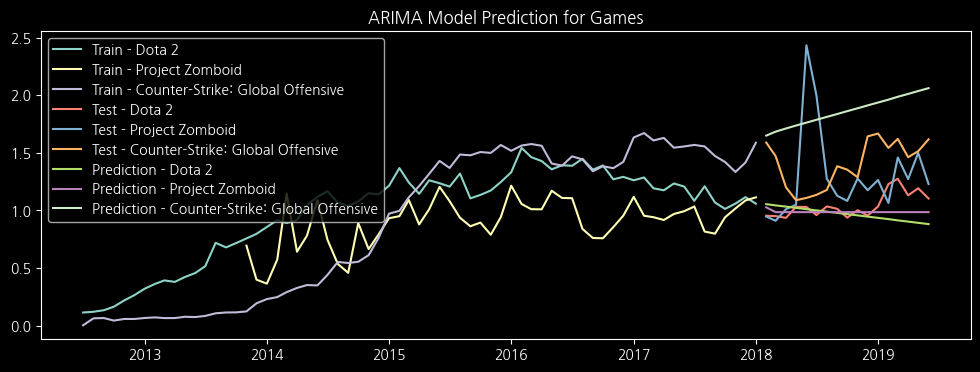

In [ ]:
fig, axes = plt.subplots(1, 1, figsize=(12, 4))

# 예측값을 담을 딕셔너리 초기화
predictions = {}

# Train 데이터
for game_name in df_tlsa_train.columns:
    plt.plot(df_tlsa_train.index, df_tlsa_train[game_name], label=f'Train - {game_name}')

# Test 데이터
for game_name in df_tlsa_test.columns:
    plt.plot(df_tlsa_test.index, df_tlsa_test[game_name], label=f'Test - {game_name}')

# Prediction 데이터
for game_name, model_fit in arima_models.items():
    tsla_pred = model_fit.predict(n_periods=len(df_tlsa_test))
    df_tsla_pred = pd.DataFrame(tsla_pred, index=df_tlsa_test.index, columns=['value'])
    predictions[game_name] = df_tsla_pred
    plt.plot(df_tsla_pred.index, df_tsla_pred['value'], label=f'Prediction - {game_name}')

plt.legend()
plt.title('ARIMA Model Prediction for Games')
plt.show()


## 매달 예측해서 고도화

In [ ]:
#코드 12-26 수정
def monthly_predictions(model_fit, test_data):
    predictions = []
    for _ in range(30):  # 30일씩 예측
        pred_next = model_fit.predict(n_periods=1)
        predictions.append(pred_next.tolist()[0])
        model_fit.update(test_data)  # 여기서 test_data는 이전 예측값이 됩니다.
    return predictions

# 각 게임에 대한 ARIMA 모델을 사용하여 한달씩 예측
monthly_predictions_dict = {}
for game_name, model_fit in arima_models.items():
    if game_name != 'Among Us':  # Among Us는 제외
        print(f"\nMonthly Predictions for {game_name}...")
        initial_value = df_tlsa_test[game_name].iloc[0]  # 첫 번째 테스트 데이터로 초기화
        monthly_preds = monthly_predictions(model_fit, initial_value)
        monthly_predictions_dict[game_name] = monthly_preds

# 결과 출력
for game_name, monthly_preds in monthly_predictions_dict.items():
    print(f"\nMonthly Predictions for {game_name}:")
    print(monthly_preds)



Monthly Predictions for Dota 2...

Monthly Predictions for Project Zomboid...

Monthly Predictions for Counter-Strike: Global Offensive...

Monthly Predictions for Dota 2:
[1.054956504077086, 0.9622851981714755, 0.938383868266877, 0.9333283784280366, 0.9329604482168731, 0.9345010423753471, 0.9362853544849221, 0.9380055464496225, 0.9395836391200576, 0.9410116559939095, 0.942299374442789, 0.9434574961833998, 0.9444978416081551, 0.9454348507326208, 0.9462792398634199, 0.947040822405639, 0.9477288740991953, 0.9483508311600446, 0.9489132864609222, 0.9494220968938243, 0.9498827382077492, 0.950297286631781, 0.9506736844454075, 0.9510144313983021, 0.9513184643327515, 0.9515758697625506, 0.9518396097064562, 0.9520607941413742, 0.9522765269276237, 0.9524650493946241]

Monthly Predictions for Project Zomboid:
[1.0272924960130154, 0.9373426325158498, 0.9768803469862737, 0.9548804727294029, 0.9627000226399655, 0.9565965093546005, 0.9574729144536552, 0.9552663165075341, 0.9547712511585531, 0.953651

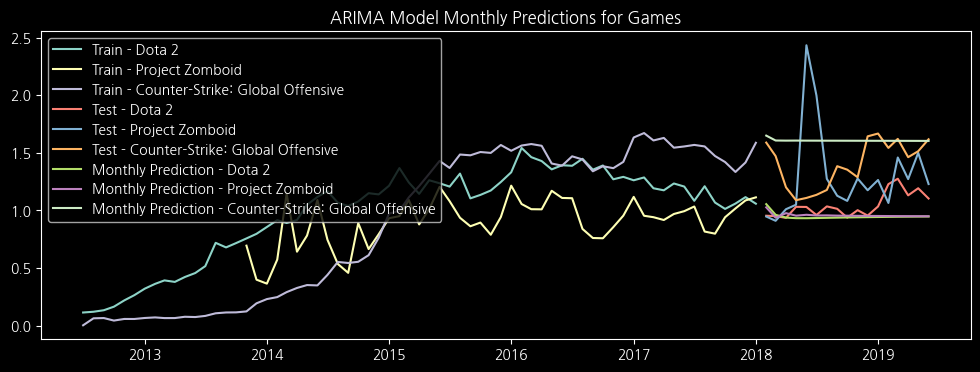

In [ ]:
# 코드 12-27 수정
fig, axes = plt.subplots(1, 1, figsize=(12, 4))

# Train 데이터
for game_name in df_tlsa_train.columns:
    plt.plot(df_tlsa_train.index, df_tlsa_train[game_name], label=f'Train - {game_name}')

# Test 데이터
for game_name in df_tlsa_test.columns:
    plt.plot(df_tlsa_test.index, df_tlsa_test[game_name], label=f'Test - {game_name}')

# Monthly Prediction 데이터
for game_name, monthly_preds in monthly_predictions_dict.items():
    # Monthly Prediction 데이터의 길이를 테스트 데이터에 맞춤
    monthly_preds = monthly_preds[:len(df_tlsa_test)]
    plt.plot(df_tlsa_test.index, monthly_preds, label=f'Monthly Prediction - {game_name}')

plt.legend()
plt.title('ARIMA Model Monthly Predictions for Games')
plt.show()


## RNN 모델로 예측

In [ ]:
for game_name in df_tlsa_train.columns:
  if game_name != 'Among Us':
    df_tlsa_train[game_name].fillna(df_tlsa_train[game_name].mean())

    # 테스트 데이터 개수만큼 예측
    df_tlsa_test[game_name]

In [ ]:
from pandas import DataFrame
from pandas import Series
from pandas import concat
from pandas import read_csv
from pandas import datetime
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from math import sqrt
from matplotlib import pyplot
from numpy import array

# date-time parsing function for loading the dataset
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')

# convert time series into supervised learning problem
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return Series(diff)

# transform series into train and test sets for supervised learning
def prepare_data(series, n_test, n_lag, n_seq):
	# extract raw values
	raw_values = series.values
	# transform data to be stationary
	diff_series = difference(raw_values, 1)
	diff_values = diff_series.values
	diff_values = diff_values.reshape(len(diff_values), 1)
	# rescale values to -1, 1
	scaler = MinMaxScaler(feature_range=(-1, 1))
	scaled_values = scaler.fit_transform(diff_values)
	scaled_values = scaled_values.reshape(len(scaled_values), 1)
	# transform into supervised learning problem X, y
	supervised = series_to_supervised(scaled_values, n_lag, n_seq)
	supervised_values = supervised.values
	# split into train and test sets
	train, test = supervised_values[0:-n_test], supervised_values[-n_test:]
	return scaler, train, test

# fit an LSTM network to training data
def fit_lstm(train, n_lag, n_seq, n_batch, nb_epoch, n_neurons):
	# reshape training into [samples, timesteps, features]
	X, y = train[:, 0:n_lag], train[:, n_lag:]
	X = X.reshape(X.shape[0], 1, X.shape[1])
	# design network
	model = Sequential()
	model.add(LSTM(n_neurons, batch_input_shape=(n_batch, X.shape[1], X.shape[2]), stateful=True))
	model.add(Dense(y.shape[1]))
	model.compile(loss='mean_squared_error', optimizer='adam')
	# fit network
	for i in range(nb_epoch):
		model.fit(X, y, epochs=1, batch_size=n_batch, verbose=0, shuffle=False)
		model.reset_states()
	return model

# make one forecast with an LSTM,
def forecast_lstm(model, X, n_batch):
	# reshape input pattern to [samples, timesteps, features]
	X = X.reshape(1, 1, len(X))
	# make forecast
	forecast = model.predict(X, batch_size=n_batch)
	# convert to array
	return [x for x in forecast[0, :]]

# evaluate the persistence model
def make_forecasts(model, n_batch, train, test, n_lag, n_seq):
	forecasts = list()
	for i in range(len(test)):
		X, y = test[i, 0:n_lag], test[i, n_lag:]
		# make forecast
		forecast = forecast_lstm(model, X, n_batch)
		# store the forecast
		forecasts.append(forecast)
	return forecasts

# invert differenced forecast
def inverse_difference(last_ob, forecast):
	# invert first forecast
	inverted = list()
	inverted.append(forecast[0] + last_ob)
	# propagate difference forecast using inverted first value
	for i in range(1, len(forecast)):
		inverted.append(forecast[i] + inverted[i-1])
	return inverted

# inverse data transform on forecasts
def inverse_transform(series, forecasts, scaler, n_test):
	inverted = list()
	for i in range(len(forecasts)):
		# create array from forecast
		forecast = array(forecasts[i])
		forecast = forecast.reshape(1, len(forecast))
		# invert scaling
		inv_scale = scaler.inverse_transform(forecast)
		inv_scale = inv_scale[0, :]
		# invert differencing
		index = len(series) - n_test + i - 1
		last_ob = series.values[index]
		inv_diff = inverse_difference(last_ob, inv_scale)
		# store
		inverted.append(inv_diff)
	return inverted

# evaluate the RMSE for each forecast time step
def evaluate_forecasts(test, forecasts, n_lag, n_seq):
	for i in range(n_seq):
		actual = [row[i] for row in test]
		predicted = [forecast[i] for forecast in forecasts]
		rmse = sqrt(mean_squared_error(actual, predicted))
		print('t+%d RMSE: %f' % ((i+1), rmse))

# plot the forecasts in the context of the original dataset
def plot_forecasts(series, forecasts, n_test):
	# plot the entire dataset in blue
	pyplot.plot(series.values)
	# plot the forecasts in red
	for i in range(len(forecasts)):
		off_s = len(series) - n_test + i - 1
		off_e = off_s + len(forecasts[i]) + 1
		xaxis = [x for x in range(off_s, off_e)]
		yaxis = [series.values[off_s]] + forecasts[i]
		pyplot.plot(xaxis, yaxis, color='red')
	# show the plot
	pyplot.show()



<ipython-input-32-3d00c125b231>:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [ ]:
# load dataset
series = read_csv('drive/My Drive/기타/steam_analysis/sales-of-shampoo.csv', header=0, parse_dates=[0], index_col=0)
# configure
n_lag = 1
n_seq = 3
n_test = 30
n_epochs = 10
n_batch = 1
n_neurons = 1
# prepare data
df = pd.DataFrame(df_tlsa_train[game_name]).reset_index().rename(columns={"date": "ds", game_name: "y"})
df['y'] = df['y'].fillna(df['y'].mean())
series = df['y']
scaler, train, test = prepare_data(series, n_test, n_lag, n_seq)
# fit model
model = fit_lstm(train, n_lag, n_seq, n_batch, n_epochs, n_neurons)
# make forecasts
forecasts = make_forecasts(model, n_batch, train, test, n_lag, n_seq)
# inverse transform forecasts and test
forecasts = inverse_transform(series, forecasts, scaler, n_test+20)
actual = [row[n_lag:] for row in test]
actual = inverse_transform(series, actual, scaler, n_test+20)
# evaluate forecasts
evaluate_forecasts(actual, forecasts, n_lag, n_seq)
# plot forecasts
plot_forecasts(series, forecasts, n_test+20)

## prophet 모델로 예측

In [ ]:
!pip install prophet

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0wq2q73o/ju5ly301.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0wq2q73o/obpt30o3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94135', 'data', 'file=/tmp/tmp0wq2q73o/ju5ly301.json', 'init=/tmp/tmp0wq2q73o/obpt30o3.json', 'output', 'file=/tmp/tmp0wq2q73o/prophet_modelx3ytakg6/prophet_model-20231205170345.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
17:03:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:03:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


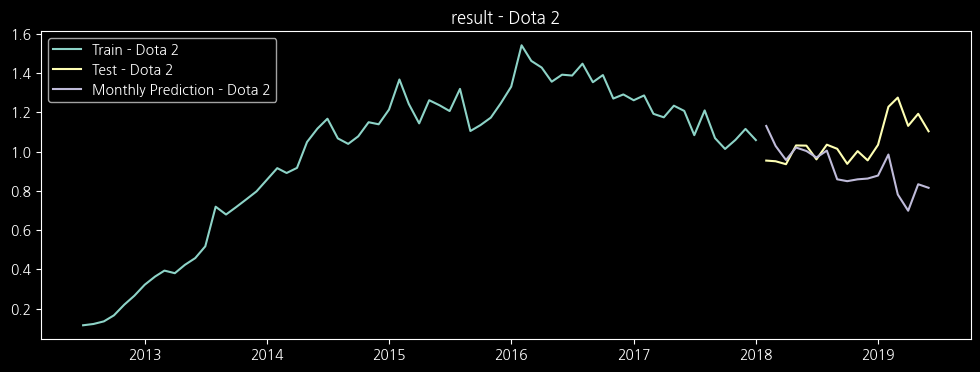

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0wq2q73o/44qx6j65.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0wq2q73o/_4bfgsxo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10829', 'data', 'file=/tmp/tmp0wq2q73o/44qx6j65.json', 'init=/tmp/tmp0wq2q73o/_4bfgsxo.json', 'output', 'file=/tmp/tmp0wq2q73o/prophet_model2i1vjn8n/prophet_model-20231205170346.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
17:03:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:03:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


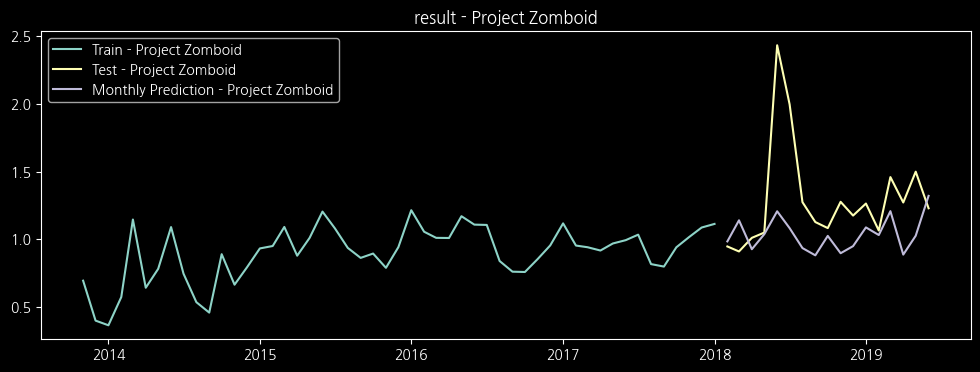

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0wq2q73o/0dkuzmqi.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0wq2q73o/w29d7fds.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25456', 'data', 'file=/tmp/tmp0wq2q73o/0dkuzmqi.json', 'init=/tmp/tmp0wq2q73o/w29d7fds.json', 'output', 'file=/tmp/tmp0wq2q73o/prophet_modeln84084ro/prophet_model-20231205170346.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
17:03:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:03:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


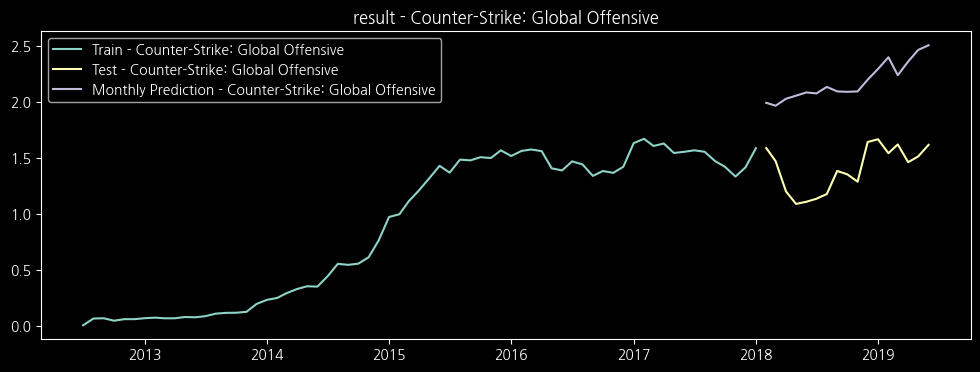

In [ ]:
import prophet

from pandas import to_datetime
from prophet import Prophet

#prophet 모델로 학습 및 예측 후 시각화하기 - https://slowsteadystat.tistory.com/7
for game_name in df_tlsa_train.columns:
  if game_name != 'Among Us':
    # prepare expected column names
    df = pd.DataFrame(df_tlsa_train[game_name]).reset_index().rename(columns={"date": "ds", game_name: "y"})
    df['y'] = df['y'].fillna(df['y'].mean())
    df['ds']= to_datetime(df['ds'])
    # define the model
    model = Prophet()
    # fit the model
    model.fit(df)

    df_test = pd.DataFrame(df_tlsa_test[game_name]).reset_index().rename(columns={"date": "ds", game_name: "y"})
    df_test['ds']= to_datetime(df_test['ds'])

    forecast = model.predict(df_test)
    y_true = df_test['y'].values
    y_pred = forecast['yhat'].values
    # plot expected vs actual
    fig, axes = plt.subplots(1, 1, figsize=(12, 4))
    plt.title(f'result - {game_name}')

    plt.plot(df_tlsa_train.index, df_tlsa_train[game_name], label=f'Train - {game_name}')
    plt.plot(df_tlsa_test.index, y_true, label=f'Test - {game_name}')
    plt.plot(df_tlsa_test.index, y_pred, label=f'Monthly Prediction - {game_name}')
    plt.legend()
    plt.show()